<center> <img src = https://flytothesky.ru/wp-content/uploads/2018/01/54327-696x435.jpg alt="drawing" style="width:400px;">

# <center> Итоговый проект: прогнозирование цены на кофе

## 1. Постановка задачи

Кофе — это сваренный напиток, приготовленный из обжаренных кофейных зерен, семян ягод некоторых цветковых растений рода Coffea. Кофе по праву считается одним из самых популярных напитков во всем мире, по своей многогранности он сравним с вином и шоколадом, что позволяет каждому найти свой напиток. 

Однако о тонкостях подготовки продукта к его итоговой форме мало кто задумывается, а ведь именно это формирует вкусоароматический профиль, которые ценит потребитель, а также итоговую цену, которую ценят закупщики во всех уголках мира.

Регион произрастания, метод обработки, степень обжарки, тип зерна и много другое формирует цену на кофе, который мы покупаем в гипермаркетах или в кофейнях. И в данном проекте мы попробуем построить модель машинного обучения, предсказывающую цену за 1 кг кофе.

**Бизнес-задача:** определить характеристики и с их помощью спрогнозировать цену за кг кофе.

**Техническая задача:** построить модель машинного обучения, которая на основе предложенных характеристик будет предсказывать числовой признак - стоимость 1 кг кофе.

**Основные цели проекта:**
1. Сформировать набор данных на основе нескольких источников информации;
2. Спроектировать новые признаки с помощью Feature Engineering и выявить наиболее значимые при построении модели;
3. Исследовать предоставленные данные и выявить закономерности;
4. Построить несколько моделей и выбрать из них наилучшую по заданной метрике;
5. Спроектировать процесс предсказания стоимости 1 кг кофе для новых данных.

## 2. Знакомство с данными, базовый анализ и расширение данных

Начнём исследование со знакомства с предоставленными данными. 

За основу был взят датасет с площадки Kaggle (https://www.kaggle.com/datasets/schmoyote/coffee-reviews-dataset), который будет расширен и переработан.

Заранее импортируем модули, которые нам понадобятся для решения задачи и зафиксируем константы.

In [2]:
# фиксация констант для воспроизведения экспериментов
RANDOM_SEED = 42
!pip freeze > requirements.txt

In [3]:
# импорт применяемых библиотек
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.geocoders import Nominatim

from scipy import stats
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import tree
from sklearn import ensemble
from sklearn import metrics
from sklearn import cluster
from sklearn import feature_selection

In [4]:
# прочитаем данные из исходного датасета
coffee_data = pd.read_csv("C:/Users/kotirevar/Desktop/Coffee diploma/data/coffee_analysis.csv")
coffee_data.head()

,name,roaster,roast,loc_country,origin_1,origin_2,100g_USD,rating,review_date,desc_1,desc_2,desc_3
0,“Sweety” Espresso Blend,A.R.C.,Medium-Light,Hong Kong,Panama,Ethiopia,14.32,95,November 2017,"Evaluated as espresso. Sweet-toned, deeply ric...",An espresso blend comprised of coffees from Pa...,A radiant espresso blend that shines equally i...
1,Flora Blend Espresso,A.R.C.,Medium-Light,Hong Kong,Africa,Asia Pacific,9.05,94,November 2017,"Evaluated as espresso. Sweetly tart, floral-to...",An espresso blend comprised of coffees from Af...,"A floral-driven straight shot, amplified with ..."
2,Ethiopia Shakiso Mormora,Revel Coffee,Medium-Light,United States,Guji Zone,Southern Ethiopia,4.70,92,November 2017,"Crisply sweet, cocoa-toned. Lemon blossom, roa...",This coffee tied for the third-highest rating ...,"A gently spice-toned, floral- driven wet-proce..."
3,Ethiopia Suke Quto,Roast House,Medium-Light,United States,Guji Zone,Oromia Region,4.19,92,November 2017,"Delicate, sweetly spice-toned. Pink peppercorn...",This coffee tied for the third-highest rating ...,Lavender-like flowers and hints of zesty pink ...
4,Ethiopia Gedeb Halo Beriti,Big Creek Coffee Roasters,Medium,United States,Gedeb District,Gedeo Zone,4.85,94,November 2017,"Deeply sweet, subtly pungent. Honey, pear, tan...",Southern Ethiopia coffees like this one are pr...,A deeply and generously lush cup saved from se...


Исходный датасет имеет 12 признаков:

* name - название кофе;
* roaster - название компании обжарщика;
* roast - степень обжарки кофе: Dark - темная, Medium-Dark - средне-темная, Medium - средняя, Medium-Light - средне-светлая, Light - светлая;
* loc_country - название страны - локация расположение обжарщика;
* origin_1 - регион_1 произрастания кофе;
* origin_2 - регион_2 произрастания кофе;
* rating - рейтинг кофе;
* review_date - дата, когда был оставлен отзыв на кофе;
* desc_1 - текстовое описание кофе №1;
* desc_2 - текстовое описание кофе №2;
* desc_3 - текстовое описание кофе №3;
* 100g_USD - цена кофе за 100 гр в долларах США (целевой признак).

In [5]:
# определение информации по параметрам датасета 
coffee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2095 entries, 0 to 2094
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         2095 non-null   object 
 1   roaster      2095 non-null   object 
 2   roast        2080 non-null   object 
 3   loc_country  2095 non-null   object 
 4   origin_1     2095 non-null   object 
 5   origin_2     2095 non-null   object 
 6   100g_USD     2095 non-null   float64
 7   rating       2095 non-null   int64  
 8   review_date  2095 non-null   object 
 9   desc_1       2095 non-null   object 
 10  desc_2       2095 non-null   object 
 11  desc_3       2093 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 196.5+ KB


Из полученных данных можно сразу сделать некоторые выводы:

1. Датасет содержит 2095 строк;
2. В признаке 'roast' есть пропуски;
3. Признак 'desc_3' также имеет пропуски, но это не критично т.к. есть еще 2 признака, описывающих кофе;
4. Только два признака ('100g_USD' и 'rating') числовые, все остальные - признаки типа object;
5. Признаки desc_2, desc_3 избыточны т.к. признак desc_1 описывает основные дескрипторы.


In [6]:
# Находим дубликаты.
dupl_columns = list(coffee_data.columns)
df_duplicates = coffee_data[coffee_data.duplicated(subset=dupl_columns)]
print(f'Число найденных дубликатов: {df_duplicates.shape[0]}')

Число найденных дубликатов: 0


Отлично! Дубликатов нет.

In [7]:
# удалим избыточные признаки
coffee_data.drop(['desc_2', 'desc_3'], axis=1, inplace=True)

In [8]:
# переименуем признак "desc_1"
coffee_data.rename(columns={"desc_1":"review"}, inplace=True)

Посмотрим на уникальное количество регионов произрастания кофе.

In [9]:
print(f"Количество уникальных регионов: {coffee_data.origin_2.nunique()}")
print("===================================================================")
print(f"Спикок регионов:\n {coffee_data.origin_2.unique()}")

Количество уникальных регионов: 357
Спикок регионов:
 ['Ethiopia' 'Asia Pacific' 'Southern Ethiopia' 'Oromia Region'
 'Gedeo Zone' 'Guji Zone' 'Sidama (Also Sidamo) Growing Region'
 'Yirgacheffe Growing Region' 'South America' 'Kenya'
 'North Kona Growing District' 'South-Central Kenya'
 'Chimaltenango Department' 'La Unión Department' 'Kirinyaga County'
 'Colombia' 'North Kivu Province' 'Costa Rica' 'Nicaragua'
 'Southern Costa Rica' 'Chiriqui Province' 'El Salvador' 'Western Panama'
 'Boquete Growing Region' 'Southern Colombia' 'Volcan'
 'Big Island Of Hawaii' 'Thika Province' 'Northern Thailand' 'Indonesia'
 'West-Central Colombia' 'North-Central Yemen' 'Guatemala'
 'Nyeri Growing Region' 'La Paz Department' 'Honduras' 'Southern Province'
 'South-Central Ethiopia' 'Aceh Province' 'Far Western Panama'
 'Center-West Colombia' 'Jimma Zone' 'Peru' 'Tolima Department'
 'South-Central Rwanda' 'Central Valley' 'Nuwakot District'
 'Tarrazu Growing Region' 'North Sumatra Province' 'South Kiv

Получаем значение 357, что очень много. Определеим для каждого региона страну, чтоб в дальнейшем использовать этот параметр. Для этого используем словарь с ключами по странам и значениями по регионам. 

In [10]:
# словарь со странами и регионами в них
regions = {"Armenia":["Armenia"],
                    "Belize":["San Ignacio"],
                    "Bolivia":["Caranavi", "La Paz"],
                    "Brazil":["Brazil","Ern Brazil'","Bahia","Amazonas","Ipanema", "Minas Gerais", "Sul De Minas", "Ern Minas Gerais", "Minas Gerais State", "Chapada Diamantina","Carmo De Minas", "Ern Brazil"],
                    "Burundi":["Kayanza", "Buhinyuza", "Burundi", "Ern Burundi"],
                    "China":["Lintong"],
                    "Colombia":["Colombia","Ern Colombia","Caldas", "Valle Del Colombia", "Urrao","Aratoca", "Risaralda", "Quindo", "Valle De Cauca", "Cauca", "Nario","Gaitania","Valle Del Cauca", "Cundinamarca", "Narino", "Huila", "Tolima", "Nariño", "Antioquia", "Caicedonia", "Planadas", "Pitalito", "Quindio"],
                    "Costa Rica":["Tarrazu","Sabanilla De Costa Rica","Turrubares", "Pos Volcano","Cartago", "Sabanilla De Costa Rica", "Mercedes Sur", "El Guarco", "Alajuela", "Brunca", "Costa Rica", "Sabanilla De Alajuela", "Santa Maria De Dota", "Naranjo", "Tarrazú"],
                    "Democratic Republic of the Congo":["Kivu", "Kalehe"],
                    "Dominican Republic":["Nueva Suiza", "Jarabacoa"],
                    "Ecuador":["Pichincha", "Santa Elena", "San Jose De Minas", "Ern Ecuador"],
                    "El Salvador":["El Salvador","Ern El Salvador","Ern El Salvador","El Salvadorilamatepec", "Ahuachapan", "La Libertad", "Chalatenango", "Apaneca-Ilamatepec", "Tecapa Chinameca", "Apaneca", "El Boquerón"],
                    "Ethiopia": ["Guji","Idamo  Ethiopia","Ethiopia Woreda", "Ern Ethiopia", "Oromia", "Ethiopia  Ethiopia", "Workasakaro", "Arbegona", "Idamo  Ethiopia", "Ethiopia Woreda", "Benchmaji", "Limu Woreda", "Gedeo", "Ethiopia Ethiopia", "Agaro Gera", "Bombe Mountains", "Jimma", "Yirgacheffe", "Ethiopia", "Sidamo (Also Sidama)", "Sidama", "Sidamo", "Gedeb", "Odo Shakiso", "Kochere", "Bench-Maji", "Hambela Wamena", "Djimma", "Hambela"],
                    "France":["Biollet"],
                    "Guatemala": ["Antigua","Lake Atitln", "Fraijanes Plateau", "San Martin Jilotepeque", "Guatemala", "Huehuetenango", "Acatenango", "Chimaltenango", "Cobán", "Suchitan", "El Progresso"],
                    "Hawai'i":["Big Island Of Hawai'I","Holualoa","Hawaii","Hawai'Iai","Big Island Of Hawai'I", "Big Island Of Hawaii","Kealakekua", "Kainaliu", "Kainaliu", "Kalaheo", "Kau", "Ka'U", "Hawai'i", "Kona", "Ka’U", "Captain Cook", "Puna"],
                    "Honduras":["Marcala","Comayagua", "Honduras", "Siguatepeque"],
                    "Indonesia":["Lintong","Ern Indonesia","Sulawesi", "Simalungun","Indonesia  Indonesia", "Indonesia", "Aceh", "Sumatra" ,"Gayo", "Java", "Toraja"],
                    "Italy":["Panchia"],
                    "Japan":["Uraga"],
                    "Kenya":["Nyeri", "Central Kenya", "Kericho", "Gichugu", "Kirinyaga", "Kenya", "South-Central Kenya", "Kiambu", "Murang'A", "Embu", "Thika", "Muranga", "Nakuru"],
                    "Mexico":["Mexico", "Chiapas", "Veracruz", "Oaxaca", "Pluma Hidalgo"],
                    "Myanmar":["Muhinga"],
                    "Nepal":["Bhirkune", "Nuwakot"],
                    "Nicaragua":["Matagalpa", "Nueva Segovia", "Jinotega"],
                    "Palestine":["Palestina"],
                    "Panama":["Boquete","Panamai","Far Ern Panama","Chiriqu", "Ern Panama", "Panama", "Chiriqui", "Piedra Candela", "Alto Quiel", "Jaramillo"],
                    "Papua New Guinea":["Papua New Guinea", "Ainantu", "Kabiufa"],
                    "Peru":["Peru","Satipo","Chirinos","Ern Peru", "Pasco","Cusco", "Cajamarca", "Utcubamba", "Trujillo", "Tabaconas"],
                    "Philippines":["Benguet", "Sierra Madre"],
                    "Rwanda":["Nyamasheke", "Huye", "Rulindo", "Rustiro", "Gikongoro", "Rwanda", "Gakenke", "Muhanga", "Nyamagabe"],
                    "Spain":["Loja", "Algeciras", "Palencia", "Santander"],
                    "Taiwan":["Alishan", "Chiayi"],
                    "Tanzania":["Tarime", "Ngorongoro"],
                    "Thailand":["Chiang Rai", "Thailand", "Tha Sae", "Chumphon"],
                    "Uganda":["Sipi Falls", "Bugisu"],
                    "United States": ["Santa Barbara","United S","United Se","United Statestates","United S", "United Statese", "El Diamante", "San Jos", "Los Altos", "San Jose", "Santa Brbara", "Santa Ana", "Villa Rica"],
                    "Yemen":["Al Hayma","Al Mashtal Ul Burhani","Yemen Governorate", "Yemen", "Bani Matar", "Haraaz", "Sana’A", "Sanaa"],
                    "Zambia":["Zambia"]
                    }

In [11]:
# дополнительный список стран и их регионов
regions_dop = {
'Armenia': ['Ararat', 'Shirak', 'Syunik', 'Tavush', 'Vayots Dzor'],
'Belize': ['Belize', 'Cayo', 'Corozal', 'Orange Walk', 'Stann Creek', 'Toledo'],
'Bolivia': ['Beni', 'Chuquisaca', 'Cochabamba', 'La Paz', 'Oruro', 'Pando', 'Potosí', 'Santa Cruz', 'Tarija'],
'Brazil': ['Acre', 'Alagoas', 'Amapá', 'Amazonas', 'Bahia', 'Ceará', 'Espírito Santo', 'Goiás', 'Maranhão', 'Mato Grosso', 'Mato Grosso do Sul', 'Minas Gerais', 'Pará', 'Paraíba', 'Paraná', 'Pernambuco', 'Piauí', 'Rio de Janeiro', 
           'Rio Grande do Norte', 'Rio Grande do Sul', 'Rondônia', 'Roraima', 'Santa Catarina', 'São Paulo', 'Sergipe', 'Tocantins', 'Distrito Federal'],
'Burundi': ['Bubanza', 'Bujumbura Mairie', 'Bujumbura Rural', 'Bururi', 'Cankuzo', 'Cibitoke', 'Gitega', 'Karuzi', 'Kayanza', 'Kirundo', 'Makamba', 'Muramvya', 'Muyinga', 'Mwaro', 'Ngozi', 'Rutana', 'Ruyigi'],
'China': ['Anhui', 'Beijing', 'Chongqing', 'Fujian', 'Gansu', 'Guangdong', 'Guangxi', 'Guizhou', 'Hainan', 'Hebei', 'Heilongjiang', 'Henan', 'Hubei', 'Hunan', 'Inner Mongolia', 'Jiangsu', 'Jiangxi', 'Jilin', 'Liaoning', 'Ningxia', 
          'Qinghai', 'Shaanxi', 'Shandong', 'Shanghai', 'Shanxi', 'Sichuan', 'Tianjin', 'Tibet', 'Xinjiang', 'Yunnan', 'Zhejiang'],
'Colombia': ['Amazonas', 'Antioquia', 'Arauca', 'Atlántico', 'Bolívar', 'Boyacá', 'Caldas', 'Caquetá', 'Casanare', 'Cauca', 'Cesar', 'Chocó', 'Córdoba', 'Cundinamarca', 'Guainía', 'Guaviare', 'Huila', 'La Guajira', 'Magdalena', 
             'Meta', 'Nariño', 'Norte de Santander', 'Putumayo', 'Quindío', 'Risaralda', 'San Andrés y Providencia', 'Santander', 'Sucre', 'Tolima', 'Valle del Cauca', 'Vaupés', 'Vichada'],
'Costa Rica': ['Alajuela', 'Cartago', 'Guanacaste', 'Heredia', 'Limón', 'Puntarenas', 'San José'],
'Democratic Republic of the Congo': ['Bandundu', 'Bas-Congo', 'Équateur', 'Kasai-Occidental', 'Kasai-Oriental', 'Katanga', 'Kinshasa', 'Maniema', 'Nord-Kivu', 'Orientale', 'Sud-Kivu'],
'Dominican Republic': ['Azua', 'Baoruco', 'Barahona', 'Dajabón', 'Distrito Nacional', 'Duarte', 'Elías Piña', 'El Seibo', 'Espaillat', 'Hato Mayor', 'Hermanas Mirabal', 'Independencia', 'La Altagracia', 'La Romana', 'La Vega', 
                       'María Trinidad Sánchez', 'Monseñor Nouel', 'Monte Cristi', 'Monte Plata', 'Pedernales', 'Peravia', 'Puerto Plata', 'Samaná', 'San Cristóbal', 'San José de Ocoa', 'San Juan', 'San Pedro de Macorís', 'Sánchez Ramírez', 
                       'Santiago', 'Santiago Rodríguez', 'Santo Domingo', 'Valverde'],
'Ecuador': ['Azuay', 'Bolivar', 'Cañar', 'Carchi', 'Chimborazo', 'Cotopaxi', 'El Oro', 'Esmeraldas', 'Galapagos', 'Guayas', 'Imbabura', "Loja", "Los Rios", "Manabi", "Morona-Santiago", "Napo", "Orellana", "Pastaza", "Pichincha", 
            "Santa Elena", "Santo Domingo de los Tsáchilas", "Sucumbios", "Tungurahua", "Zamora-Chinchipe"],
'El Salvador': ['Ahuachapán', 'Cabañas', 'Chalatenango', 'Cuscatlán', 'La Libertad', 'La Paz', 'La Unión', 'Morazán', 'San Miguel', 'San Salvador', 'San Vicente', 'Santa Ana', 'Sonsonate', 'Usulután'],
'Ethiopia': ['Afar', 'Amhara', 'Benishangul-Gumuz', 'Dire Dawa', 'Gambela', 'Harari', 'Oromia', 'Somali', 'Southern Nations, Nationalities, and Peoples', 'Tigray'],
'France': ['Auvergne-Rhône-Alpes', 'Bourgogne-Franche-Comté', 'Brittany', 'Centre-Val de Loire', 'Corsica', 'Grand Est', 'Hauts-de-France', 'Île-de-France', 'Normandy', 'Nouvelle-Aquitaine', 'Occitanie', 
           'Pays de la Loire', 'Provence-Alpes-Côte d’Azur'],
'Guatemala': ['Alta Verapaz', 'Baja Verapaz', 'Chimaltenango', 'Chiquimula', 'El Progreso', 'Escuintla', 'Guatemala', 'Huehuetenango', 'Izabal', 'Jalapa', 'Jutiapa', 'Petén', 'Quetzaltenango', 'Quiché', 
              'Retalhuleu', 'Sacatepéquez', 'San Marcos', 'Santa Rosa', 'Sololá', 'Suchitepéquez', 'Totonicapán', 'Zacapa'],
"Hawai'i": ['Hawaii', 'Honolulu', 'Kauai', 'Maui'],
'Honduras': ['Atlántida', 'Choluteca', 'Colón', 'Comayagua', 'Copán', 'Cortés', 'El Paraíso', 'Francisco Morazán', 'Gracias a Dios', 'Intibucá', 'Islas de la Bahía', 'La Paz', 'Lempira', 'Ocotepeque', 
             'Olancho', 'Santa Bárbara', 'Valle', 'Yoro'],
'Indonesia': ['Aceh', 'Bali', 'Bangka Belitung', 'Banten', 'Bengkulu', 'Central Java', 'Central Kalimantan', 'Central Sulawesi', 'East Java', 'East Kalimantan', 'East Nusa Tenggara', 'Gorontalo', 'Jakarta', 'Jambi', 
              'Lampung', 'Maluku', 'North Kalimantan', 'North Maluku', 'North Sulawesi', 'North Sumatra', 'Papua', 'Riau', 'Riau Islands', 'South Kalimantan', 'South Sulawesi', 'South Sumatra', 'Southeast Sulawesi', 
              'West Java', 'West Kalimantan', 'West Nusa Tenggara', 'West Papua', 'West Sulawesi', 'West Sumatra', 'Yogyakarta'],
'Italy': ['Abruzzo', 'Aosta Valley', 'Apulia', 'Basilicata', 'Calabria', 'Campania', 'Emilia-Romagna', 'Friuli-Venezia Giulia', 'Lazio', 'Liguria', 'Lombardy', 'Marche', 'Molise', 'Piedmont', 'Sardinia', 'Sicily', 
          'Trentino-South Tyrol', 'Tuscany', 'Umbria', 'Veneto'],
'Japan': ['Aichi', 'Akita', 'Aomori', 'Chiba', 'Ehime', 'Fukui', 'Fukuoka', 'Fukushima', 'Gifu', 'Gunma', 'Hiroshima', 'Hokkaido', 'Hyogo', 'Ibaraki', 'Ishikawa', 'Iwate', 'Kagawa', 'Kagoshima', 'Kanagawa', 'Kochi', 
          'Kumamoto', 'Kyoto', 'Mie', 'Miyagi', 'Miyazaki', 'Nagano', 'Nagasaki', 'Nara', 'Niigata', 'Oita', 'Okayama', 'Okinawa', 'Osaka', 'Saga', 'Saitama', 'Shiga', 'Shimane', 'Shizuoka', 'Tochigi', 'Tokushima', 'Tokyo', 
          'Tottori', 'Toyama', 'Wakayama', 'Yamagata', 'Yamaguchi', 'Yamanashi'],
'Kenya': ['Baringo', 'Bomet', 'Bungoma', 'Busia', 'Elgeyo-Marakwet', 'Embu', 'Garissa', 'Homa Bay', 'Isiolo', 'Kajiado', 'Kakamega', 'Kericho', 'Kiambu', 'Kilifi', 'Kirinyaga', 'Kisii', 'Kisumu', 'Kitui', 'Kwale', 'Laikipia', 
          'Lamu', 'Machakos', 'Makueni', 'Mandera', 'Marsabit', 'Meru', 'Migori', 'Mombasa', 'Murang', 'Nairobi', 'Nakuru', 'Nandi', 'Narok', 'Nyamira', 'Nyandarua', 'Nyeri', 'Samburu', 'Siaya', 'Taita-Taveta', 'Tana River', 
          'Tharaka-Nithi', 'Trans-Nzoia', 'Turkana', 'Uasin Gishu', 'Vihiga', 'Wajir', 'West Pokot'],
'Mexico': ['Aguascalientes', 'Baja California', 'Baja California Sur', 'Campeche', 'Chiapas', 'Chihuahua', 'Coahuila', 'Colima', 'Durango', 'Guanajuato', 'Guerrero', 'Hidalgo', 'Jalisco', 'Mexico City', 'Mexico State', 
           'Michoacán', 'Morelos', 'Nayarit', 'Nuevo León', 'Oaxaca', 'Puebla', 'Querétaro', 'Quintana Roo', 'San Luis Potosí', 'Sinaloa', 'Sonora', 'Tabasco', 'Tamaulipas', 'Tlaxcala', 'Veracruz', 'Yucatán', 'Zacatecas'],
'Myanmar': ['Ayeyarwady', 'Bago', 'Chin', 'Kachin', 'Kayah', 'Kayin', 'Magway', 'Mandalay', 'Mon', 'Naypyidaw', 'Rakhine', 'Sagaing', 'Shan', 'Tanintharyi', 'Yangon'],
'Nepal': ['Bagmati', 'Bheri', 'Dhawalagiri', 'Gandaki', 'Janakpur', 'Karnali', 'Koshi', 'Lumbini', 'Mahakali', 'Mechi', 'Narayani', 'Rapti', 'Sagarmatha', 'Seti'],
'Nicaragua': ['Atlántico Norte', 'Atlántico Sur', 'Boaco', 'Carazo', 'Chinandega', 'Chontales', 'Estelí', 'Granada', 'Jinotega', 'León', 'Madriz', 'Managua', 'Masaya', 'Matagalpa', 'Nueva Segovia', 'Río San Juan', 'Rivas'],
'Palestine': ['West Bank', 'Gaza Strip'],
'Panama': ['Bocas del Toro', 'Chiriquí', 'Coclé', 'Colón', 'Darién', 'Emberá-Wounaan', 'Guna Yala', 'Herrera', 'Los Santos', 'Ngäbe-Buglé', 'Panamá', 'Panamá Oeste', 'Veraguas'],
'Papua New Guinea': ['Bougainville', 'Central', 'Chimbu', 'East New Britain', 'Eastern Highlands', 'Enga', 'Gulf', 'Hela', 'Jiwaka', 'Madang', 'Manus', 'Milne Bay', 'Morobe', 'National Capital District', 'New Ireland', 
                     'Northern', 'Southern Highlands', 'West New Britain', 'Western'],
'Peru': ['Amazonas', 'Áncash', 'Apurímac', 'Arequipa', 'Ayacucho', 'Cajamarca', 'Callao', 'Cusco', 'Huancavelica', 'Huánuco', 'Ica', 'Junín', 'La Libertad', 'Lambayeque', 'Lima', 'Loreto', 'Madre de Dios', 'Moquegua', 
         'Pasco', 'Piura', 'Puno', 'San Martín', 'Tacna', 'Tumbes', 'Ucayali'],
'Philippines': ['Abra', 'Agusan del Norte', 'Agusan del Sur', 'Aklan', 'Albay', 'Antique', 'Apayao', 'Aurora', 'Basilan', 'Bataan', 'Batanes', 'Batangas', 'Benguet', 'Biliran', 'Bohol', 'Bukidnon', 'Bulacan', 'Cagayan', 
                'Camarines Norte', 'Camarines Sur', 'Camiguin', 'Capiz', 'Catanduanes', 'Cavite', 'Cebu', 'Cotabato', 'Davao de Oro', 'Davao del Norte', 'Davao del Sur', 'Davao Occidental', 'Davao Oriental', 'Dinagat Islands', 
                'Eastern Samar', 'Guimaras', 'Ifugao', 'Ilocos Norte', 'Ilocos Sur', 'Iloilo', 'Isabela', 'Kalinga', 'La Union', 'Laguna', 'Lanao del Norte', 'Lanao del Sur', 'Leyte', 'Maguindanao', 'Marinduque', 'Masbate', 
                'Misamis Occidental', 'Misamis Oriental', 'Mountain Province', 'Negros Occidental', 'Negros Oriental', 'Northern Samar', 'Nueva Ecija', 'Nueva Vizcaya', 'Occidental Mindoro', 'Oriental Mindoro', 'Palawan', 'Pampanga', 
                'Pangasinan', 'Quezon', 'Quirino', 'Rizal', 'Romblon', 'Samar', 'Sarangani', 'Siquijor', 'Sorsogon', 'South Cotabato', 'Southern Leyte', 'Sultan Kudarat', 'Sulu', 'Surigao del Norte', 'Surigao del Sur', 'Tarlac', 
                'Tawi-Tawi', 'Zambales', 'Zamboanga del Norte', 'Zamboanga del Sur', 'Zamboanga Sibugay'],
'Rwanda': ['Eastern', 'Northern', 'Southern', 'Western'],
'Spain': ['Andalusia', 'Aragon', 'Asturias', 'Balearic Islands', 'Basque Country', 'Canary Islands', 'Cantabria', 'Castilla-La Mancha', 'Castilla y León', 'Catalonia', 'Extremadura', 'Galicia', 'La Rioja', 'Madrid', 'Murcia', 
          'Navarre', 'Valencian Community'],
'Taiwan': ['Changhua', 'Chiayi', 'Hsinchu', 'Hualien', 'Kaohsiung', 'Keelung', 'Kinmen', 'Lienchiang', 'Miaoli', 'Nantou', 'Penghu', 'Pingtung', 'Tainan', 'Taipei', 'Taitung', 'Taoyuan', 'Yilan', 'Yunlin'],
"Tanzania": ["Arusha", "Dar es Salaam", "Dodoma", "Geita", "Iringa", "Kagera", "Kigoma", "Kilimanjaro", "Lindi", "Manyara", "Mara", "Mbeya", "Morogoro", "Mtwara", "Mwanza", "Njombe", "Pemba North", "Pemba South", "Pwani", "Rukwa", 
             "Ruvuma", "Shinyanga", "Simiyu", "Singida", "Tabora", "Tanga", "Zanzibar Central/South", "Zanzibar North", "Zanzibar Urban/West"],
"Thailand": ["Amnat Charoen", "Ang Thong", "Bangkok", "Bueng Kan", "Buri Ram", "Chachoengsao", "Chai Nat", "Chaiyaphum", "Chanthaburi", "Chiang Mai", "Chiang Rai", "Chon Buri", "Chumphon", "Kalasin", "Kamphaeng Phet", "Kanchanaburi", 
             "Khon Kaen", "Krabi", "Lampang", "Lamphun", "Loei", "Lopburi", "Mae Hong Son", "Maha Sarakham", "Mukdahan", "Nakhon Nayok", "Nakhon Pathom", "Nakhon Phanom", "Nakhon Ratchasima", "Nakhon Sawan", "Nakhon Si Thammarat", "Nan", 
             "Narathiwat", "Nong Bua Lam Phu", "Nong Khai", "Nonthaburi", "Pathum Thani", "Pattani", "Phang Nga", "Phatthalung", "Phayao", "Phetchabun", "Phetchaburi", "Phichit", "Phitsanulok", "Phrae", "Phuket", "Prachin Buri", 
             "Prachuap Khiri Khan", "Ranong", "Ratchaburi", "Rayong", "Roi Et", "Sa Kaeo", "Sakon Nakhon", "Samut Prakan", "Samut Sakhon", "Samut Songkhram", "Saraburi", "Satun", "Si Sa Ket", "Sing Buri", "Songkhla", "Sukhothai", 
             "Suphan Buri", "Surat Thani", "Surin", "Tak", "Trang", "Trat", "Ubon Ratchathani", "Udon Thani", "Uthai Thani", "Uttaradit", "Yala", "Yasothon"],
"Uganda": ["Abim", "Adjumani", "Amolatar", "Amuria", "Amuru", "Apac", "Arua", "Budaka", "Bududa", "Bugiri", "Buhweju", "Buikwe", "Bukedea", "Bukomansimbi", "Bukwo", "Bulambuli", "Buliisa", "Bundibugyo", "Bunyangabu", "Busia", 
           "Butaleja", "Butambala", "Butebo", "Buvuma", "Buyende", "Dokolo", "Gomba", "Gulu", "Hoima", "Ibanda", "Iganga", "Isingiro", "Jinja", "Kaabong", "Kabale", "Kabarole", "Kaberamaido", "Kalangala", "Kaliro", "Kalungu", 
           "Kampala", "Kamuli", "Kamwenge", "Kanungu", "Kapchorwa", "Kasese", "Katakwi", "Katerera", "Kayunga", "Kazo", "Kibaale", "Kiboga", "Kikube", "Kiruhura", "Kiryandongo", "Kisoro", "Kitgum", "Koboko", "Kole", "Kotido", 
           "Kumi", "Kween", "Kyankwanzi", "Kyegegwa", "Kyenjojo", "Lamwo", "Lira"],
"United States": ["Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", "Connecticut", "Delaware", "Florida", "Georgia", "Hawaii", "Idaho", "Illinois", "Indiana", "Iowa", "Kansas", "Kentucky", "Louisiana", 
                  "Maine", "Maryland", "Massachusetts", "Michigan", "Minnesota", "Mississippi", "Missouri", "Montana", "Nebraska", "Nevada", "New Hampshire", "New Jersey", "New Mexico", "New York", "North Carolina", "North Dakota", 
                  "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Vermont", "Virginia", "Washington", "West Virginia", "Wisconsin", "Wyoming"],
"Yemen": ["Abyan", "Ad Dali'", "Al Bayda'", "Al Hudaydah", "Al Jawf", "Al Mahrah", "Al Mahwit", "Dhamar", "Hadramawt", "Hajjah", "Ibb", "Lahij", "Ma'rib", "Raymah", "Sa'dah", "Sana'a", "Shabwah", "Ta'izz"],
"Zambia": ["Central", "Copperbelt", "Eastern", "Luapula", "Lusaka", "Muchinga", "Northern", "North-Western", "Southern", "Western"],
"Africa": ["Algeria", "Angola", "Benin", "Botswana", "Burkina Faso", "Burundi", "Cabo Verde", "Cameroon", "Central African Republic", "Chad", "Comoros", "Congo (Brazzaville)", "Congo (Kinshasa)", "Cote d'Ivoire", "Djibouti", "Egypt", 
           "Equatorial Guinea", "Eritrea", "Eswatini", "Ethiopia", "Gabon", "Gambia", "Ghana", "Guinea", "Guinea-Bissau", "Kenya", "Lesotho", "Liberia", "Libya", "Madagascar", "Malawi", "Mali", "Mauritania", "Mauritius", "Morocco", 
           "Mozambique", "Namibia", "Niger", "Nigeria", "Rwanda", "Sao Tome and Principe", "Senegal", "Seychelles", "Sierra Leone", "Somalia", "South Africa", "South Sudan", "Sudan", "Tanzania", "Togo", "Tunisia", "Uganda", "Zambia", "Zimbabwe"],
"Malaysia": ["Johor", "Kedah", "Kelantan", "Labuan", "Melaka", "Negeri Sembilan", "Pahang", "Perak", "Perlis", "Penang", "Sabah", "Sarawak", "Selangor", "Terengganu"],
"Haiti": ["Artibonite", "Centre", "Grand'Anse", "Nippes", "Nord", "Nord-Est", "Nord-Ouest", "Ouest", "Sud", "Sud-Est"],
"Vietnam": ["An Giang", "Bà Rịa-Vũng Tàu", "Bắc Giang", "Bắc Kạn", "Bạc Liêu", "Bắc Ninh", "Bến Tre", "Bình Định", "Bình Dương", "Bình Phước", "Bình Thuận", "Cà Mau", "Cần Thơ", "Cao Bằng", "Đà Nẵng", "Đắk Lắk", "Đắk Nông", "Điện Biên", "Đồng Nai", 
            "Đồng Tháp", "Gia Lai", "Hà Giang", "Hà Nam", "Hà Nội", "Hà Tĩnh", "Hải Dương", "Hải Phòng", "Hậu Giang", "Hòa Bình", "Hưng Yên", "Khánh Hòa", "Kiên Giang", "Kon Tum", "Lai Châu", "Lâm Đồng", "Lạng Sơn", "Lào Cai", "Long An", "Nam Định", 
            "Nghệ An", "Ninh Bình", "Ninh Thuận", "Phú Thọ", "Phú Yên", "Quảng Bình", "Quảng Nam", "Quảng Ngãi", "Quảng Ninh", "Quảng Trị", "Sóc Trăng", "Sơn La", "Tây Ninh", "Thái Bình", "Thái Nguyên", "Thanh Hóa", "Thừa Thiên-Huế", "Tiền Giang", 
            "Trà Vinh", "Tuyên Quang", "Vĩnh Long", "Vĩnh Phúc", "Yên Bái"]
}

In [12]:
# объединяем словари в один
for k, v in regions_dop.items():
    if k in regions:
        regions[k].extend(v)
    else:
        regions[k] = v

Устраним некоторые опечатки.

In [13]:
coffee_data.loc[coffee_data["origin_1"]=="United S", "origin_1"] = "United States"
coffee_data.loc[coffee_data["origin_1"]=="United Statestatese", "origin_1"] = "United States"
coffee_data.loc[coffee_data["origin_1"] == "United Statestates", "origin_1"] = "United States"
coffee_data.loc[coffee_data["origin_2"] == "United Statestates", "origin_2"] = "United States"
coffee_data.loc[coffee_data["loc_country"]=="New Taiwan", "loc_country"] = "Taiwan"
coffee_data.loc[coffee_data["loc_country"]=="Hawai'I", "loc_country"] = "Hawai'i"

In [14]:
# функция, которая ищет в параметре name название страны из словаря regions и записывает их в отдельный признак
def find_origin(name, regions):
    for region in regions:
        if any(region in n for n in name.split()):
            return region
    return None

In [15]:
# функция, которая ищет в параметре name название региона из словаря regions и записывает их в отдельный признак
def assign_origin(df, regions, feature):
    for index, row in df.iterrows():
        if pd.isnull(row['origin']):
            for country, region_names in regions.items():
                if country.lower() in row[feature].lower() or any(region.lower() in row[feature].lower() for region in region_names):
                    df.at[index, 'origin'] = country
                    break

    return df

In [16]:
# применяем функции
coffee_data['origin'] = coffee_data['name'].apply(lambda x: find_origin(x, regions))
coffee_data = assign_origin(coffee_data, regions, 'origin_1')
coffee_data = assign_origin(coffee_data, regions, 'origin_2')

Проверим на наличие пропусков.

In [17]:
coffee_data.isna().sum()

name            0
roaster         0
roast          15
loc_country     0
origin_1        0
origin_2        0
100g_USD        0
rating          0
review_date     0
review          0
origin          8
dtype: int64

Видим, что у нас присутствуют пропуски. Взглянем на них.

In [18]:
rows_with_missing_origin = coffee_data[coffee_data['origin'].isnull()]
display(rows_with_missing_origin)

,name,roaster,roast,loc_country,origin_1,origin_2,100g_USD,rating,review_date,review,origin
1165,El Salvador La Guachocha,Cafe Grumpy,Medium-Light,United States,Canton Lomas De San Marcelino,Coatepeque,7.05,93,March 2021,"Deep-toned, chocolaty. Chocolate-covered graha...",None
1705,El Salvador Finca Mileydi Pacamara,Red Rooster Coffee Roaster,Medium-Light,United States,Cantón El Tunel,La Palma,7.35,95,February 2022,"Richly sweet-savory. Mulberry, lemon verbena, ...",None
1730,Barokah Honey Sumatra,JBC Coffee Roasters,Medium-Light,United States,Gunung Tujuh,Kerinci,5.58,95,March 2022,"Spice-toned, complex, deep. Baking spices, dat...",None
1787,Ka‘ū Tropical Punch Washed,Paradise Roasters,Medium-Light,United States,Ka‘Ū,Big Island Of Hawai’I,22.05,94,May 2022,"Fruit-forward, high-toned. POG (pineapple, ora...",None
1797,Ka‘ū Lactic Natural,Paradise Roasters,Medium-Light,United States,Ka‘Ū,Big Island Of Hawai‘I,26.46,95,May 2022,"Voluptuous, juicy, unique. Starfruit, cocoa ni...",None
1913,Hawaii Ka‘ū Bourbon Anaerobic Natural,Paradise Roasters,Medium-Light,United States,Ka‘Ū Growing Region,Big Island Of Hawai’I,26.46,95,July 2022,"Richly sweet-tart, floral and fruit-driven. Ma...",None
2021,Ka‘ū Champagne Natural Half-Caf,Paradise Roasters,Light,United States,Ka‘Ū Growing Region,Big Island Of Hawai’I,26.46,93,September 2022,"Delicately sweet-tarty, fruity and lively. Bak...",None
2089,Tinamit Tolimán,El Gran Cafe,Medium-Light,Guatemala,San Lucas Tolimán,Lake Atitlán Growing Region,4.70,93,November 2022,"Deeply sweet-tart, chocolate-toned. Dark choco...",None


Автоматически определить все регионы не удалось, но пропущенных значений не так много, заполним вручную.

In [19]:
coffee_data.loc[coffee_data['name'] == 'El Salvador La Guachocha', 'origin'] = 'El Salvador'
coffee_data.loc[coffee_data['name'] == 'El Salvador Finca Mileydi Pacamara', 'origin'] = 'El Salvador'
coffee_data.loc[coffee_data['name'] == 'Barokah Honey Sumatra', 'origin'] = 'Indonesia'
coffee_data.loc[coffee_data['name'] == 'Hawaii Ka‘ū Bourbon Anaerobic Natural', 'origin'] = "Hawai'i"
coffee_data.loc[coffee_data['name'] == 'Ka‘ū Tropical Punch Washed', 'origin'] = "Hawai'i"
coffee_data.loc[coffee_data['name'] == 'Ka‘ū Lactic Natural', 'origin'] = "Hawai'i"
coffee_data.loc[coffee_data['name'] == 'Ka‘ū Champagne Natural Half-Caf', 'origin'] = "Hawai'i"
coffee_data.loc[coffee_data['name'] == 'Tinamit Tolimán', 'origin'] = 'Guatemala'


В целом все хорошо, мы довольно конкретно раскидали все виды кофе по странам, только регион Африка выглядит слишком масштабным. Посмотрим, какие данные туда попали.

In [20]:
rows_with_africa_origin = coffee_data[coffee_data['origin'] == "Africa"]
display(rows_with_africa_origin)

,name,roaster,roast,loc_country,origin_1,origin_2,100g_USD,rating,review_date,review,origin
650,Madagascar Yellow Bourbon Santatra Coop,Paradise Roasters,Medium-Light,United States,Madagascar,Odo Shakiso District,8.80,92,January 2020,"Delicately sweet-tart, nut-toned. Hazelnut, li...",Africa
850,South Africa Elephant Coast Estate Coffea Race...,Paradise Roasters,Medium-Light,United States,Kwazulu-Natal Province,South Africa,35.19,92,August 2020,"Richly bittersweet, deep-toned. Hop flowers, p...",Africa
1040,Flower Queens of Africa Blend,Green Stone Coffee,Medium-Light,Taiwan,Guji Zone,Oromia Region,9.60,93,November 2020,"Richly fruit- and floral-toned. Blueberry, gar...",Africa
1535,Out of Africa Blend,RamsHead Coffee Roasters,Medium-Light,United States,Kenya,Ethiopia,5.28,92,November 2021,Richly fruit-toned with savory undercurrents. ...,Africa


Для двух позиций неверно определа страна. Вручную изменим это, а для остальных позиций укажим более конкретный регион континента.

In [21]:
coffee_data.loc[coffee_data['name'] == 'Madagascar Yellow Bourbon Santatra Coop', 'origin'] = 'South Africa'
coffee_data.loc[coffee_data['name'] == 'South Africa Elephant Coast Estate Coffea Racemosa', 'origin'] = 'South Africa'
coffee_data.loc[coffee_data['name'] == 'Flower Queens of Africa Blend', 'origin'] = 'Taiwan'
coffee_data.loc[coffee_data['name'] == 'Out of Africa Blend', 'origin'] = 'Kenya'

In [22]:
# удаляем неинформативные признаки
coffee_data.drop(["origin_1", 'origin_2'], axis=1, inplace=True)

Преобразуем целевой признак. 

Данные в датасете содаржат цену за 100гр кофе. В эту цену входит куча дополнительных параметров:

- обжарка;
- брак;
- расходы на производство;
- упаковка;
- наценка;
- хранение.

Все, кроме последнего, определить конкретно достаточно сложно в виду разностей оборудования (ростеров), разностей курса валют, оплаты труда и т.д. 

Из открытых баз ценообразования кофе примем, что все расходы, составляет 37%.

Не будем переводить цену в рубли т.к. все торги с фермерами и так ведутся в долларах. К тому же инфляция доллара нижне, чем инфляция рубля, а значит цены со временем меньше подвержены изменениям. 

Для удобства примем вес упаковки кофе равной 1 кг.

In [23]:
industrial_expense = 0.37

coffee_data['price_kg/USD'] = round(10*coffee_data['100g_USD']*(1-industrial_expense), 2)

coffee_data.drop(["100g_USD"], axis=1, inplace=True)

Преобразуем признак review.

Для этого из различных баз соберем список самых частых встречающихся дескрипторов кофе, который поможет при обработке признака.

In [24]:
# список дескрипторов кофе
descriptors = ['Sour','Sweet','Salt','Bitter','Soury','Acrid','Hard','Winey','Tart','Tangy','Acidy','Piquant','Nippy','Mellow','Mild','Delicate','Bland','Soft','Neutral','Sharp','Rough','Astringent','Harsh','Alkaline',
                  'Caustic','Pungent','Phenolic','Creosol','Flowery','Floral','Coffee Blossom','Tea Rose','Fragrant','Cardamon Caraway','Coriander Seeds','Fragrant','Cardamon Caraway','Coriander Seeds','Fruity','Citrus',
                  'Lemon','Apple','Berry','Apricot','Blackberry','Herby','Alliaceous','Onion','Garlic','Leguminous','Cucumber','Garden Peas','Nutty','Nut','Roasted Peanuts','Walnuts','Malt','Basmati Rice','Toast','Caramelly',
                  'Candy','Roasted Hazelnut','Roasted Almond','Syrup','Honey','Maple Syrup','Chocolaty','Chocolate','Bakers','Dark Chocolate','Vanilla','Swiss','Butter','Resinous','Turpeny','Piney','Black Currant','Medicinal',
                  'Camphoric','Cineolic','Spicy','Warming','Cedar','Pepper','Pungent','Clove','Thyme','Carbony','Smoky','Tarry','Pipe Tobacco','Ashy','Burnt','Charred','Earthy','Fresh Earth','Wet Soil','Humus','Groundy','Mushroom',
                  'Raw Potato','Erpsig','Dirty','Dusty','Grady','Barny','Musty','Concrete','Mildewy','Mulch','Moldy','Yeasty','Starchy','Cappy','Baggy','Carvocrol','Fatty','Mineral Oil','Tipped','Cereal','Biscuity','Skunky','Scorched',
                  'Cooked','Charred','Empyreumatic','Baked','Bakey','Flat','Dull','Sweaty','Butyric Acid','Soapy','Lactic','Hidy','Tallowy','Leather','Wet wool','Horsey','Hircine','Cooked Beef','Gamey','Fermented','Coffee Pulp','Acerbic',
                  'Leesy','Rioy','Iodine','Carbolic','Acrid','Rubbery','Butyl Phenol','Kerosene','Ethanol','Loss of Organic Material','Grassy','Green','Hay','Strawy','Aged','Full','Rounded','Smooth','Woody','Wet Paper','Wet Cardboard',
                  'Filter Pad','Flowery','Fruity','Herby','Nutty','Caramelly','Chocolaty','Resinous','Spicy','Carbony','Earthy','Groundy','Dirty','Musty','Mouldy','Baggy','Tipped','Scorched','Baked','Sweaty','Hidy','Horsey','Fermented',
                  'Rioy','Rubbery','Grassy','Aged','Woody','Sour','Sweet','Salt','Bitter''Sour','Sweet','Salt','Bitter','Soury','Acrid','Hard','Winey','Tart','Tangy','Acidy','Piquant','Nippy','Mellow','Mild','Delicate','Bland','Soft','Neutral',
                  'Sharp','Rough','Astringent','Harsh','Alkaline','Caustic','Pungent','Phenolic','Creosol','Flowery','Floral','Coffee Blossom','Tea Rose','Fragrant','Cardamon Caraway','Coriander Seeds','Fragrant','Cardamon Caraway','Coriander Seeds',
                  'Fruity','Citrus','Lemon','Apple','Berry','Apricot','Blackberry','Herby','Alliaceous','Onion','Garlic','Leguminous','Cucumber','Garden Peas','Nutty','Nut','Roasted Peanuts','Walnuts','Malt','Basmati Rice','Toast','Caramelly','Candy',
                  'Roasted Hazelnut','Roasted Almond','Syrup','Honey','Maple Syrup','Chocolaty','Chocolate','Bakers','Dark Chocolate','Vanilla','Swiss','Butter','Resinous','Turpeny','Piney','Black Currant','Medicinal','Camphoric','Cineolic','Spicy','Warming',
                  'Cedar','Pepper','Pungent','Clove','Thyme','Carbony','Smoky','Tarry','Pipe Tobacco','Ashy','Burnt','Charred','Earthy','Fresh Earth','Wet Soil','Humus','Groundy','Mushroom','Raw Potato','Erpsig','Dirty','Dusty','Grady','Barny','Musty',
                  'Concrete','Mildewy','Mulch','Moldy','Yeasty','Starchy','Cappy','Baggy','Carvocrol','Fatty','Mineral Oil','Tipped','Cereal','Biscuity','Skunky','Scorched','Cooked','Charred','Empyreumatic','Baked','Bakey','Flat','Dull','Sweaty','Butyric Acid',
                  'Soapy','Lactic','Hidy','Tallowy','Leather','Wet wool','Horsey','Hircine','Cooked Beef','Gamey','Fermented','Coffee Pulp','Acerbic','Leesy','Rioy','Iodine','Carbolic','Acrid','Rubbery','Butyl Phenol','Kerosene','Ethanol','Loss of Organic Material',
                  'Grassy','Green','Hay','Strawy','Aged','Full','Rounded','Smooth','Woody','Wet Paper','Wet Cardboard','Filter Pad','Flowery','Fruity','Herby','Nutty','Caramelly','Chocolaty','Resinous','Spicy','Carbony','Earthy','Groundy','Dirty','Musty','Mouldy','Baggy',
                  'Tipped','Scorched','Baked','Sweaty','Hidy','Horsey','Fermented','Rioy','Rubbery','Grassy','Aged','Woody','Sour','Sweet','Salt','Bitter', 'Blossom', 'Crisply', 'rich', 'smooth', 'bold', 'creamy', 'nutty', 'caramel', 'chocolate', 'fruity', 'citrusy', 'earthy',
                  'smoky', 'spicy', 'sweet', 'bitter', 'clean', 'floral', 'woody', 'herbal', 'toasted', 'grassy', 'malty','honey', 'vanilla', 'butterscotch', 'roasted', 'cocoa', 'toffee', 'maple', 'raisin', 'plum', 'berry','apple', 'lemon', 'orange', 'lime', 'grapefruit', 
                  'peach', 'pear', 'cherry', 'apricot', 'pineapple','kiwi', 'mango', 'coconut', 'almond', 'walnut', 'pecan', 'cashew', 'hazelnut', 'pistachio', 'cinnamon','ginger', 'nutmeg', 'cloves', 'cardamom', 'black pepper', 'caramelized', 'roasty', 'malty', 'smoky',
                  'floral', 'fruity', 'wine-like', 'cocoa', 'tart', 'bright', 'citrusy', 'fresh', 'clean', 'smooth','juicy', 'mellow', 'sweetness', 'acidity', 'brightness', 'balance', 'lively', 'complex', 'vibrant','intense', 'elegant', 'robust', 'aromatic', 'melody', 
                  'full-bodied', 'velvety', 'lingering', 'delicate','inviting', 'crisp', 'creamy', 'well-rounded', 'brisk', 'satisfying', 'refreshing', 'gourmet','deep', 'distinctive', 'subtle', 'fragrant', 'layered', 'exquisite', 'refined', 'harmonious','energizing', 
                  'comforting', 'roasty', 'natural', 'strong', 'complexity', 'syrupy', 'buttery', 'silky','wholesome', 'robust', 'toasted', 'savory', 'enticing', 'captivating', 'lingering', 'full-flavored','coffee', 'aroma', 'taste', 'mouthfeel', 'finish', 'aftertaste', 
                  'characteristic', 'distinct', 'delicious','invigorating', 'stimulating', 'vivid', 'nuanced', 'inviting', 'energizing', 'smoothness', 'body','tannic', 'acidic', 'earthy', 'nutty', 'tangy', 'spicy', 'unusual', 'well-defined', 'flavorful', 'redolent',
                  'pronounced', 'pronounced', 'strong', 'sweet', 'sweet', 'acidy', 'tangy', 'pungent', 'pungent', 'rustic','silky', 'velvety', 'mature', 'velvety', 'tobacco', 'grassy', 'dark', 'scented', 'smooth', 'fruity','sour', 'bright', 'full', 'smooth', 'deep',
                  'full', 'distinguished', 'specialty', 'mild', 'oaky', 'creamy','brittle', 'dense', 'fizzy', 'tangy', 'strong', 'bold', 'smooth', 'delicate', 'distinctive', 'nutty','rich', 'robust', 'satisfying', 'smooth', 'sweet', 'buttery', 'chocolaty', 'clean', 
                  'complex', 'crisp','earthy', 'flavorful', 'refreshing', 'fruity', 'fragrant', 'full-bodied', 'lively', 'mellow', 'roasted','smoky', 'spicy', 'subtle', 'robust', 'tart', 'velvety', 'vibrant', 'well-balanced', 'woody', 'zingy','balanced', 'invigorating', 
                  'toasty', 'aromatic', 'caramelized', 'toffee', 'citrusy', 'nutmeg', 'cinnamon','biscuity', 'dark chocolate', 'baking spice', 'bergamot', 'brown sugar', 'bittersweet', 'cacao nibs','clean finish', 'cocoa powder', 'dark berry', 'floral notes', 'fresh', 
                  'green apple', 'hazelnut praline','lemony', 'light-bodied', 'malty sweetness', 'matured', 'molasses', 'nut-like', 'nutty aftertaste','overripe fruit', 'pecan pie', 'plum aftertaste', 'praline', 'ripe cherry', 'ripe fruit', 'semi-sweet','slight bitterness', 
                  'smooth aroma', 'smooth body', 'strong aroma', 'strong flavor', 'sweet aftertaste','toasted almonds', 'well-rounded body', 'whiskey barrel', 'winey', 'zingy acidity', 'rich', 'chocolatey', 'fruity', 'floral', 'nutty', 'caramel', 'spicy', 'earthy', 'citrusy', 
                  'herbal', 'smooth', 'balanced', 'bright', 'bold', 'complex', 'creamy', 'delicate', 'intense', 'mellow', 'robust', 'sweet', 'tangy', 'velvety', 'vibrant', 'full-bodied', 'aromatic', 'crisp', 'juicy', 'honeyed', 'toasty', 'syrupy', 'buttery', 'clean', 'refreshing', 
                  'subtle', 'zingy', 'mild', 'strong', 'bitter', 'acidic', 'earthy', 'woody', 'smoky', 'nutmeg', 'cinnamon', 'vanilla', 'cocoa', 'hazelnut', 'almond', 'caramel', 'toffee', 'citrus', 'lemon', 'orange', 'grapefruit', 'lime', 'berry', 'blueberry', 'strawberry',
                  'raspberry', 'blackberry', 'cherry', 'apple', 'pear', 'apricot', 'plum', 'peach', 'melon', 'pineapple', 'mango', 'papaya', 'passionfruit', 'kiwi', 'guava', 'jasmine', 'rose', 'lavender', 'chamomile', 'mint', 'herbaceous', 'grassy', 'earthy', 'woody', 'spicy', 
                  'peppery', 'anise', 'nutmeg', 'cardamom', 'clove', 'ginger', 'coriander', 'black tea', 'green tea', 'earl grey', 'chai', 'cacao', 'molasses', 'maple syrup', 'honey', 'brown sugar', 'caramelized', 'toasted', 'biscuit', 'pastry', 'malty', 'buttery', 'creamy', 
                  'vanilla', 'coconut', 'toasted coconut', 'toasty', 'nutty', 'roasted', 'smoky', 'bold', 'bright', 'crisp', 'smooth', 'velvety', 'full-bodied', 'balanced', 'complex', 'aromatic', 'refreshing', 'juicy', 'sweet', 'tangy', 'honeyed', 'subtle', 'zingy', 'bitter',
                  'acidic', 'earthy', 'woody', 'spicy', 'nutmeg', 'cinnamon', 'vanilla', 'cocoa', 'hazelnut', 'almond', 'caramel', 'toffee', 'citrus', 'lemon', 'orange', 'grapefruit', 'lime', 'berry', 'blueberry', 'strawberry', 'raspberry', 'blackberry', 'cherry', 'apple',
                  'pear', 'apricot', 'plum', 'peach', 'melon', 'pineapple', 'mango', 'papaya', 'passionfruit', 'kiwi', 'guava', 'jasmine', 'rose', 'lavender', 'chamomile', 'mint', 'herbaceous', 'grassy', 'earthy', 'woody', 'spicy', 'peppery', 'anise', 'nutmeg', 'cardamom', 
                  'clove', 'ginger', 'coriander', 'black tea', 'green tea', 'earl grey', 'chai', 'cacao', 'molasses', 'maple syrup', 'honey', 'brown sugar', 'caramelized', 'toasted', 'biscuit', 'pastry', 'malty', 'buttery', 'creamy', 'vanilla', 'coconut', 'toasted coconut', 
                  'toasty', 'nutty', 'roasted', 'smoky', 'bold', 'bright', 'crisp', 'smooth', 'velvety', 'full-bodied', 'balanced', 'complex', 'aromatic', 'refreshing', 'juicy', 'sweet', 'tangy', 'honeyed', 'subtle', 'zingy', 'bitter', 'acidic', 'earthy', 'woody', 'spicy', 
                  'nutmeg', 'cinnamon', 'vanilla', 'cocoa', 'hazelnut', 'almond', 'caramel', 'toffee', 'citrus', 'lemon', 'orange', 'grapefruit', 'lime', 'berry', 'blueberry', 'strawberry', 'raspberry', 'blackberry', 'cherry', 'apple', 'pear', 'apricot', 'plum', 'peach', 
                  'melon', 'pineapple', 'mango', 'papaya', 'passionfruit', 'kiwi', 'guava', 'jasmine', 'rose', 'lavender', 'chamomile', 'mint', 'herbaceous', 'grassy', 'earthy', 'woody', 'spicy', 'peppery', 'anise', 'nutmeg', 'cardamom', 'clove', 'ginger', 'coriander', 
                  'black tea', 'green tea', 'earl grey', 'chai', 'cacao', 'molasses', 'maple syrup', 'honey', 'brown sugar', 'caramelized', 'toasted', 'biscuit', 'pastry', 'malty', 'buttery', 'creamy', 'vanilla', 'coconut', 'toasted coconut', 'toasty', 'nutty', 'roasted', 
                  'smoky', 'bold', 'bright', 'crisp', 'smooth', 'velvety', 'full-bodied', 'balanced', 'complex', 'aromatic', 'refreshing', 'juicy', 'sweet', 'tangy', 'honeyed', 'subtle', 'zingy', 'bitter', 'acidic', 'earthy', 'woody', 'spicy', 'nutmeg', 'cinnamon', 'vanilla', 
                  'cocoa', 'hazelnut', 'almond', 'caramel', 'toffee', 'citrus', 'lemon', 'orange', 'grapefruit', 'lime', 'berry', 'blueberry', 'strawberry', 'raspberry', 'blackberry', 'cherry', 'apple', 'pear', 'apricot', 'plum', 'peach', 'melon', 'pineapple', 'mango', 
                  'papaya', 'passionfruit', 'kiwi', 'guava', 'jasmine', 'rose', 'lavender', 'chamomile', 'mint', 'herbaceous', 'grassy', 'earthy', 'woody', 'spicy', 'peppery', 'anise', 'nutmeg', 'cardamom', 'clove', 'ginger', 'coriander', 'black tea', 'green tea', 'earl grey', 
                  'chai', 'cacao', 'molasses', 'maple syrup', 'honey', 'brown sugar', 'caramelized', 'toasted', 'biscuit', 'pastry', 'malty', 'buttery', 'creamy', 'vanilla', 'coconut', 'toasted coconut', 'toasty', 'nutty', 'roasted', 'smoky', 'bold', 'bright', 'crisp', 
                  'smooth', 'velvety', 'full-bodied', 'balanced', 'complex', 'aromatic', 'refreshing', 'juicy', 'sweet', 'tangy', 'honeyed', 'subtle', 'zingy', 'bitter', 'acidic', 'earthy', 'woody', 'spicy', 'nutmeg', 'cinnamon', 'vanilla', 'cocoa', 'hazelnut', 'almond', 
                  'caramel', 'toffee', 'citrus', 'lemon', 'orange', 'grapefruit', 'lime', 'berry', 'blueberry', 'strawberry', 'raspberry', 'blackberry', 'cherry', 'apple', 'pear', 'apricot', 'plum', 'peach', 'melon', 'pineapple', 'mango', 'papaya', 'passionfruit', 'kiwi', 
                  'guava', 'jasmine', 'rose', 'lavender', 'chamomile', 'mint', 'herbaceous', 'grassy', 'earthy', 'woody', 'spicy', 'peppery', 'anise', 'nutmeg', 'cardamom', 'clove', 'ginger', 'coriander', 'black tea', 'green tea', 'earl grey', 'chai', 'cacao', 'molasses', 
                  'maple syrup', 'honey', 'brown sugar', 'caramelized', 'toasted', 'biscuit', 'pastry', 'malty', 'buttery']

In [25]:
# удалим повторяющиеся слова
descriptors = pd.Series(list(set(descriptors)))

# преобразуем получивнуюся переменную
descriptors = descriptors.str.lower()
descriptors = descriptors.str.replace("[^A-Za-z' ]","", regex=True)

# вернем получившийся результат в вид списка
descriptors = list(descriptors)

In [26]:
# функция вычленения из признака review дескрипторов из списка descriptors
import re

def clean_and_match_text(data, text_feature, word_list, new_feature):
    # создание нового признака 
    data[new_feature] = ""

    # цикл прохода по каждой строке текстового признака
    for index, row in data.iterrows():
        # получение текстового описания вкуса кофе
        text = row[text_feature]

        # избавление от знаков препинания и разделителей
        text = re.sub('[^a-zA-Zа-яА-ЯёЁ0-9]+', ' ', text)

        # Разделение текста на слова
        words = text.split()

        # цикл прохода по каждому слову
        for word in words:
            # проверка, содержится ли слово в списке
            if word in word_list:
                # проверка, есть ли уже это слово в новом признаке
                if word not in row[new_feature]:
                    # добавление слова в новый признак
                    data.at[index, new_feature] += word + " "
    return data

In [27]:
# применение функции к датасету
coffee_data = clean_and_match_text(coffee_data, "review", descriptors, "descriptors")

In [28]:
coffee_data['descriptors'] = coffee_data['descriptors'].str.split()

In [29]:
# удаление признака review
coffee_data.drop(["review"], axis=1, inplace=True)

Поработаем с пропусками.

In [30]:
coffee_data.isna().sum()

name             0
roaster          0
roast           15
loc_country      0
rating           0
review_date      0
origin           0
price_kg/USD     0
descriptors      0
dtype: int64

Видно, что признак roast имеет пропуски. Конечно, можно было бы их удалить, но нам ценно сохранить как можно больше данных. 

Самым правильным решением будет заменить пропуски на 'Medium' так как именно эта степень обжарки считается универсальной как для приготовления эспресса, так и для альтернативных способов заваривания кофе.

In [31]:
coffee_data['roast'] = coffee_data['roast'].apply(lambda x: 'Medium' if x is np.nan else x)

In [32]:
# из признака review_date выделим признаки review_month и review_year, которые соответствуют месяцу и году, когда было описание кофе
coffee_data['review_date'] = pd.to_datetime(coffee_data['review_date'])
coffee_data['review_month'] = coffee_data['review_date'].dt.month
coffee_data['review_year'] = coffee_data['review_date'].dt.year
coffee_data.drop(["review_date"], axis=1, inplace=True)

Так как в датасете представлены данные от небольших компаний по обжарке кофе считаем, что срок свежести такого продукта не превышает 1,5 месяца, а значит данных о стране произрастания кофе можно брать за тот же год, что и год описания кофе.

Дополним наши данные информацией из датасета Global Country Information Dataset 2023, взятого с площадки Kaggle (https://www.kaggle.com/datasets/nelgiriyewithana/countries-of-the-world-2023).

In [33]:
# чтение данных
world_data = pd.read_csv("C:/Users/kotirevar/Desktop/Coffee diploma/data/world-data-2023.csv")
world_data.head()

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60,AF,58.10%,"652,230","323,000",32.49,93.0,Kabul,"8,672",...,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.939110,67.709953
1,Albania,105,AL,43.10%,"28,748","9,000",11.78,355.0,Tirana,"4,536",...,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331
2,Algeria,18,DZ,17.40%,"2,381,741","317,000",24.28,213.0,Algiers,"150,006",...,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626
3,Andorra,164,AD,40.00%,468,NaN,7.20,376.0,Andorra la Vella,469,...,36.40%,3.33,"77,142",NaN,NaN,NaN,NaN,"67,873",42.506285,1.521801
4,Angola,26,AO,47.50%,"1,246,700","117,000",40.73,244.0,Luanda,"34,693",...,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025",-11.202692,17.873887


Датасет имеет 35 признаков:

* Country - название страны;
* Density (P/Km2) - плотность населения (чел/км2);
* Abbreviation - аббревиатура или код страны;
* Agricultural Land (%) - процент земель, используемых под сельское хозяйство в процентах;
* Land Area (Km2) - площадь страны в км2;
* Armed Forces Size - численность вооруженных сил страны;
* Birth Rate - число рожденных на 1000 человек;
* Calling Code - международный телефонный код страны;
* Capital/Major City - название столицы;
* CO2 Emissions - количество выбросов углекислого газа в тоннах;
* CPI - индекс потребительских цен, показатель инфляции и покупательной способности;
* CPI Change (%) - процентное изменение индекса потребительских цен по сравнению с предыдущим годом;
* Currency_Code - код валюты, используемой в стране; 
* Fertility Rate - среднее число детей, рожденных женщиной за всю жизнь;
* Forested Area (%) - процент территории, покрытой лесами;
* Gasoline_Price - цена бензина за литр в местной валюте;
* GDP - валовой внутренний продукт — общая стоимость товаров и услуг, произведенных в стране;
* Gross Primary Education Enrollment (%) - валовой коэффициент охвата начальным образованием;
* Gross Tertiary Education Enrollment (%) - валовой коэффициент охвата высшим образованием;
* Infant Mortality - число смертей на 1000 живорождений в возрасте до одного года;
* Largest City - название крупнейшего города страны;
* Life Expectancy - среднее количество лет, которое, как ожидается, проживет новорожденный;
* Maternal Mortality Ratio - количество материнских смертей на 100 000 живорождений;
* Minimum Wage - уровень минимальной заработной платы в местной валюте;
* Official Language - официальный язык(и), на котором говорят в стране;
* Out of Pocket Health Expenditure (%) - процент общих расходов на здравоохранение, оплачиваемых физическими лицами из собственного кармана;
* Physicians per Thousand - число врачей на тысячу человек;
* Population - общая численность населения страны;
* Population: Labor Force Participation (%) - Процент населения, входящего в состав рабочей силы;
* Tax Revenue (%) - налоговые поступления в процентах от ВВП;
* Total Tax Rate - общая налоговая нагрузка в процентах от коммерческой прибыли;
* Unemployment Rate - процент рабочей силы, которая является безработной;
* Urban Population - процент населения, проживающего в городских районах;
* Latitude - координата широты местоположения страны;
* Longitude - долгота координаты местоположения страны.

Из всего этого многообразия требуется отобрать только 'Agricultural Land( %)' и 'GDP', а также 'Country' для дальнейщего объединения датасетов.

In [34]:
world_data = world_data[['Country', 'Agricultural Land( %)', 'GDP']]

In [35]:
# объединение датасетов
coffee_data = coffee_data.merge(
    world_data,
    left_on = 'origin',
    right_on = 'Country',
    how='left'
)

In [36]:
# очистка признаков Agricultural Land (%) и GDP от разделяющих знаков 
coffee_data['Agricultural Land( %)'] = coffee_data['Agricultural Land( %)'].str.replace('[^\d.]', '', regex=True)
coffee_data['GDP'] = coffee_data['GDP'].str.replace('[^\d.]', '', regex=True)

# изменение типа данных на float
coffee_data['Agricultural Land( %)'] = coffee_data['Agricultural Land( %)'].astype(float)
coffee_data['GDP'] = coffee_data['GDP'].astype(float)

In [37]:
# проверка пропущенных значений в столбцах "Agricultural Land (%)" и "GDP"
missing_values = coffee_data[coffee_data['origin'].notna() & (coffee_data['Agricultural Land( %)'].isna() | coffee_data['GDP'].isna())]

# вывод стран с пропущенными значениями
countries_with_missing_values = missing_values['origin'].unique()
print('Страны с пропущенными значениями:', countries_with_missing_values)

Страны с пропущенными значениями: ["Hawai'i" 'Taiwan']


Всего 2 такие страны. Заполним пропуски вручную.

In [38]:
coffee_data.loc[coffee_data['origin'] == "Hawai'i", 'Agricultural Land( %)'] = 38.3
coffee_data.loc[coffee_data['origin'] == "Hawai'i", 'GDP'] = 103262000

In [39]:
coffee_data.loc[coffee_data['origin'] == 'Taiwan', 'Agricultural Land( %)'] = 21.7
coffee_data.loc[coffee_data['origin'] == 'Taiwan', 'GDP'] = 1852330000

In [40]:
# удаление признака Country
coffee_data.drop(["Country"], axis=1, inplace=True)

In [41]:
coffee_data.isna().sum()

name                     0
roaster                  0
roast                    0
loc_country              0
rating                   0
origin                   0
price_kg/USD             0
descriptors              0
review_month             0
review_year              0
Agricultural Land( %)    0
GDP                      0
dtype: int64

In [42]:
# переименование признака
coffee_data.rename(columns={"Agricultural Land( %)":"agricultural_land (%)"}, inplace=True)

У нас есть информация об обжарщиках из Америки, Гонконга, Канады и т.д. Было бы здорово иметь данные от наших обжарщиков. И, благо, мы можем дополнить датасет такими данными. 

Для этого обратимся к компании The Walder Catherine	(https://theweldercatherine.ru/), которые ведут политику открытого ценообразования (https://docs.google.com/spreadsheets/d/1x4GZsUkzbBkAE9kyTslruu4TJSB_jULT/edit#gid=1199774536).

Предварительно обработав исходные данные, получаем датасет the_welder_catherine.xlsx.

In [43]:
# чтение данных
welder_data = pd.read_excel("C:/Users/kotirevar/Desktop/Coffee diploma/data/the_welder_catherine.xlsx")
welder_data.head()

,name,roaster,roast,price_kg/USD,loc_country,origin,method,descriptors,rating,review_month,review_year
0,Эфиопия Челбеса,The Walder Catherine,Dark,14.70,Russia,Ethiopia,anaerobic,crisply sweet blossom citrus floral,88.00,1,2020
1,Эфиопия Лалиса,The Walder Catherine,Dark,12.10,Russia,Ethiopia,washed,berry candy lemon blossom sweet citrus,87.50,1,2022
2,Коста-Рика Уильям Мора,The Walder Catherine,Dark,16.22,Russia,Costa Rica,experimental,spicy fruity,89.00,3,2020
3,Колумбия Габриэль Кастаньо Анаэробная,The Walder Catherine,Dark,23.50,Russia,Colombia,experimental,sweet berry blossom bakey,87.25,8,2020
4,Колумбия Пасто Седе БОЧКА,The Walder Catherine,Dark,9.43,Russia,Colombia,washed,hard piney sweet сrisply,88.00,8,2021


Исходный датасет имеет 11 признаков:

* name - название кофе;
* roaster - название компании обжарщика;
* roast - степень обжарки кофе: Dark - темная, Light - светлая;
* price_kg/USD - цена кофе за 1 кг в долларах США (целевой признак);
* loc_country - название страны - локация расположение обжарщика;
* origin - регион произрастания кофе;
* method - метод обработки кофе;
* descriptors - описание вкусо-ароматического профиля кофе;
* rating - рейтинг кофе;
* review_month - месяц, когда было проведено описание кофе;
* review_year - год, когда было проведено описание кофе.

In [44]:
welder_data['descriptors'] = welder_data['descriptors'].str.split()

In [45]:
# объединяем датасеты
coffee_data = coffee_data.merge(
    welder_data,
    on = ['origin', 'name', 'roaster', 'roast', 'price_kg/USD', 'rating', 'review_month', 'review_year', 'loc_country'],
    how='outer' 
)

C:\Users\kotirevar\AppData\Local\Temp\ipykernel_6328\2642290341.py:2: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  coffee_data = coffee_data.merge(


In [46]:
# заполнение пропусков в признаке Agricultural Land (%) с учетом характеристик для стран из origin
coffee_data['agricultural_land (%)'] = coffee_data.groupby('origin')['agricultural_land (%)'].transform(lambda x: x.fillna(x.mean()))

# заполнение пропусков в признаке GDP с учетом характеристик для стран из origin
coffee_data['GDP'] = coffee_data.groupby('origin')['GDP'].transform(lambda x: x.fillna(x.mean()))

In [47]:
# заполняем признак descriptors_x значениями из descriptors_y
coffee_data['descriptors_x'].fillna(coffee_data['descriptors_y'], inplace=True)

# переименуем признак descriptors_x
coffee_data.rename(columns={"descriptors_x":"descriptors"}, inplace=True)

# удалим признак descriptors_y
coffee_data.drop(["descriptors_y"], axis=1, inplace=True)

In [48]:
# проверим наличие пропусков
coffee_data.isna().sum()

name                        0
roaster                     0
roast                       0
loc_country                 0
rating                      0
origin                      0
price_kg/USD                0
descriptors                 0
review_month                0
review_year                 0
agricultural_land (%)       0
GDP                         0
method                   2095
dtype: int64

Попробуем заполнить признак method. Часто в названии кофе прописывается способ обработки зерна.

In [49]:
# список методов обработки 
methods = ['natural', 'washed', 'wet hulled', 'honey', 'anaerobic', 'wet', 'semi washed', 'carbonic maceration', 'giling basah', 'dry', 'pulped natural', 'experimental']

In [50]:
def add_method(df, methods):
    for method in methods:
        df.loc[df['name'].str.contains(method, case=False), 'method'] = method
    return df

In [51]:
coffee_data = add_method(coffee_data, methods)

In [52]:
# проверим наличие пропусков
coffee_data.isna().sum()

name                        0
roaster                     0
roast                       0
loc_country                 0
rating                      0
origin                      0
price_kg/USD                0
descriptors                 0
review_month                0
review_year                 0
agricultural_land (%)       0
GDP                         0
method                   1468
dtype: int64

Все еще много пропусков. Заполним их 0. Если признак будет информативен, преобразуем его позже.

In [53]:
coffee_data['method'] = coffee_data['method'].fillna(0)

Попробуем определить, позиция является моносортом или это бленд из разных сортов кофе. Будем проверять только иностранные наименования т.к. в ассортименте The Walder Catherine только моносорта.

In [54]:
coffee_data['mono'] = coffee_data['name'].apply(lambda x: 'no' if 'blend' in x.lower() else 'yes')

In [55]:
# подсчет количества обжарщиков кофе
roaster_counts = coffee_data['roaster'].value_counts()

# отбираем 50 самых популярных обжарщиков
top_roasters = roaster_counts.head(50)

print(top_roasters)

JBC Coffee Roasters                159
Kakalove Cafe                      141
Paradise Roasters                  135
The Walder Catherine                46
Temple Coffee Roasters              42
Bird Rock Coffee Roasters           41
Red Rooster Coffee Roaster          40
Dragonfly Coffee Roasters           37
RamsHead Coffee Roasters            36
GK Coffee                           36
Big Shoulders Coffee                25
Hula Daddy Kona Coffee              24
Jackrabbit Java                     23
El Gran Cafe                        21
Barrington Coffee Roasting          20
Durango Coffee Company              19
Jaunt Coffee Roasters               19
Revel Coffee                        18
Nostalgia Coffee Roasters           18
modcup coffee                       17
Peach Coffee Roasters               17
Temple Coffee and Tea               17
Small Eyes Cafe                     17
Willoughby's Coffee & Tea           17
SkyTop Coffee                       16
PT's Coffee Roasting Co. 

Получаем список из 50 компаний. По хорошему, нужно найти рейтинг каждой отдельной компании с помощью парсинга, однако большинство представленных обжарщиков зарубежные. Получить API Google Maps для пользователей из России сейчас невозможно, а парсинг без API может 
может неверно определить рейтинг. Поэтому заполним этот параметр вручную.

In [56]:
# словарь с названием компаний в ключах и их рейтингов в значениях
roster_ratings = {"Kakalove Cafe": 4.9,
           "JBC Coffee Roasters": 4.8,
           "Paradise Roasters": 4.7,
           "The Walder Catherine": 4.7,
           "Dragonfly Coffee Roasters": 4.6,
           "Bird Rock Coffee Roasters": 4.5,
           "Temple Coffee Roasters": 4.5,
           "GK Coffee": 4.7,
           "Hula Daddy Kona Coffee": 4.6,
           "RamsHead Coffee Roasters": 4.7,
           "Red Rooster Coffee Roaster": 4.5,
           "El Gran Cafe": 4.7,
           "Big Shoulders Coffee": 4.5,
           "Jackrabbit Java": 4.8,
           "Coffee Please": 4,
           "Durango Coffee Company": 4.7,
           "Hala Tree Kona Coffee": 4.9,
           "Temple Coffee and Tea": 4.5,
           "modcup coffee": 4.6,
           "Barrington Coffee Roasting": 4.9,
           "Small Eyes Cafe": 4.6,
           "PT's Coffee Roasting Co.": 4.6,
           "Quartet Kaffe": 4,
           "Big Creek Coffee Roasters": 4.5,
           "Jaunt Coffee Roasters": 4.9,       
           "Revel Coffee": 4.7,
           "Nostalgia Coffee Roasters": 4.8,
           "Peach Coffee Roasters": 4.5,
           "Willoughby's Coffee & Tea": 4,
           "SkyTop Coffee": 4.8,
           "Amavida Coffee Roasters": 4.5,
           "Lexington Coffee Roasters": 4.5,
           "Cafe Kreyol": 4.4,
           "Equator Coffees": 4,
           "Magnolia Coffee": 4.7,
           "Hala Tree Kona Coffee": 4.6,
           "Euphora Coffee": 4.7,
           "Roadmap CoffeeWorks": 4.8,
           "Klatch Coffee": 4.5,
           "Wonderstate Coffee": 4.6,
           "Espresso Republic": 4.7,
           "Simon Hsieh Aroma Roast Coffees": 4.5,
           "Green Stone Coffee": 4.8,
           "Indaba Coffee Roasters": 4.6,
           "Big Island Coffee Roasters": 4,
           "David's Nose": 4.5,
           "Plat Coffee Roastery": 4.9,
           "Corvus Coffee Roasters": 4.5,
           "Propeller Coffee": 4.6,
           "Cozy House Coffee": 4.6,
           "Mystic Monk Coffee": 4.5
                    }

In [57]:
# для всех компаний их списка top_roasters вывести их рейтинг из roster_ratings
coffee_data['roaster_rating'] = coffee_data['roaster'].apply(lambda x: roster_ratings.get(x, 0) if x in top_roasters else 0)

# все компании не из списка top_roasters заменить на other и присвоить им рейтинг 0
coffee_data['roaster'] = coffee_data['roaster'].apply(lambda x: x if x in top_roasters else "other")

Для полноты картины не хватает понимания, сколько всего в тот или иной год экспортируется кофейного зерна из той или иной страны.

Заполнить этот пробел нам поможет датасет World Coffee Exports: 1990-2019 с площадки Kaggle (https://www.kaggle.com/datasets/danbraswell/world-coffee-exports-19902019).

In [58]:
# чтение данных
export_data = pd.read_csv("C:/Users/kotirevar/Desktop/Coffee diploma/data/coffee_exports.csv")
export_data.head()

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,all_years
0,Angola,84,71,80,39,8,41,52,50,54,...,8,8,6,9,11,11,9,9,23,722
1,Bolivia (Plurinational State of),156,74,96,47,84,94,123,111,97,...,74,63,55,62,30,22,26,22,20,2291
2,Brazil,16936,21183,18791,17838,17273,14468,15251,16801,18144,...,33806,28549,31651,37335,37563,34269,30925,35637,40698,786432
3,Burundi,585,688,646,418,508,528,224,529,374,...,218,392,195,252,230,204,169,202,293,10770
4,Cameroon,2611,1752,1646,705,546,407,564,1368,746,...,490,622,272,375,390,281,245,287,250,23332


Датасет имеет 32 признака:

* country - название страны;
* 1990-2019 - количество экспортируемого кофе в тысячах мешков по 60 кг;
* all_years - сумма экспортируемых мешков с 1990 по 2019 годы для каждой страны.

In [59]:
# удалим признак all_years т.к. он будет давать нам шум при дальнейшем преобразовании данных
export_data.drop(["all_years"], axis=1, inplace=True)

In [60]:
# переименуем некоторые признаки 
export_data.loc[export_data['country'] == 'Bolivia (Plurinational State of)', 'country'] = 'Bolivia'
export_data.loc[export_data['country'] == 'Democratic Republic of Congo', 'country'] = 'Democratic Republic of the Congo'
export_data.loc[export_data['country'] == 'Madagascar', 'country'] = 'South Africa'
export_data.loc[export_data['country'] == 'Viet Nam', 'country'] = 'Vietnam'

В датасете coffee_data представлены данные с 2017 по 2022 года. Видно, что в датасете export_data не хватает данных за 3 года (2020-2022 года). Попробуем экстраполировать эти данные для каждой страны.

In [61]:
from scipy import interpolate

def fill_coffee_bags_forecast(export_data):
    # Создаем пустые столбцы для годов 2020, 2021 и 2022
    export_data['2020'] = None
    export_data['2021'] = None
    export_data['2022'] = None
    
    # получаем список стран из столбца 'year/country'
    countries = export_data['country'][1:]
    
    # итерируемся по странам
    for country in countries:
        # получаем исторические данные для страны
        historical_data = export_data.loc[export_data['country'] == country].values[0][1:-3]
        
        # получаем индексы ненулевых значений
        non_zero_indices = [i for i, x in enumerate(historical_data) if x is not None]
        
        # получаем значения ненулевых годов
        non_zero_years = export_data.columns[1:-3][non_zero_indices].astype(int)
        
        # получаем значения ненулевых экспортных данных
        non_zero_values = historical_data[non_zero_indices].astype(int)
        
        # создаем функцию экстраполяции
        f = interpolate.interp1d(non_zero_years, non_zero_values, kind='linear', fill_value='extrapolate')
        
        # заполняем значения для годов 2020, 2021 и 2022
        export_data.loc[export_data['country'] == country, '2020'] = abs(f(2020))
        export_data.loc[export_data['country'] == country, '2021'] = abs(f(2021))
        export_data.loc[export_data['country'] == country, '2022'] = abs(f(2022))
    
    return export_data

In [62]:
# применяем полученную функцию к нашему датасету
export_data = fill_coffee_bags_forecast(export_data)

In [63]:
# создаем список из уникальных стран
cofee_country = list(coffee_data['origin'].unique())

In [64]:
# в датасете export_data отберем только те строки, которые совпадают с названием стран из датасета coffee_data
export_data = export_data.loc[export_data['country'].isin(cofee_country)]

In [65]:
# удаление индекса
export_data.reset_index(drop= True , inplace= True )

In [66]:
# отделение данных по временому промежутку
export_data = export_data[['country', '2017', '2018', '2019', '2020', '2021', '2022']]

In [67]:
# объединяем датасеты
coffee_data = coffee_data.merge(
    export_data,
    left_on = 'origin',
    right_on = 'country',
    how='left'
)

In [68]:
# создаем функцию, которая будет сопостовлять год экспорта для каждой отдельной страны и заполнять данными из export_data
def calculate_export_count(row):
    if row['review_year'] == 2017:
        return row['2017']
    elif row['review_year'] == 2018:
        return row['2018']
    elif row['review_year'] == 2019:
        return row['2019']
    elif row['review_year'] == 2020:
        return row['2020']
    elif row['review_year'] == 2021:
        return row['2021']
    elif row['review_year'] == 2022:
        return row['2022']
    else:
        return None

# применение функции к датасету для создания признака export_count
coffee_data['export_count'] = coffee_data.apply(calculate_export_count, axis=1)

In [69]:
# удаляем ненужные признаки
coffee_data.drop(['2017', '2018', '2019', '2020', '2021', '2022', 'country'], axis=1, inplace=True)

In [70]:
# переведем признак export_count из 1000 мешков по 60 кг в кг
coffee_data['export_count'] = coffee_data['export_count']*1000*60

In [71]:
# проверим наличие пропусков
coffee_data.isna().sum()

name                       0
roaster                    0
roast                      0
loc_country                0
rating                     0
origin                     0
price_kg/USD               0
descriptors                0
review_month               0
review_year                0
agricultural_land (%)      0
GDP                        0
method                     0
mono                       0
roaster_rating             0
export_count             183
dtype: int64

У нас образовались пропуски в признаке export_count. Это связано с тем, что в датасете export_data отсутствует информация о ряде стран. Заполним их вручную.

Будем использовать только те данные, которые есть в открытом доступе. 

In [72]:
# словарь, ключами которого являются страны, ключами вложенных словарей - год экспорта, а значениями - количество кг экспортируемого кофе 
export_dict = {"Hawai'i": [ { 2017: 12959588, 2018: 11154744, 2019: 11974839, 2020: 12192563, 2021: 12110916, 2022: 12882023 } ],
           "Taiwan": [ { 2017: 1033837, 2018: 951766, 2019: 976279, 2020: 948638, 2021: 1031620, 2022: 984317 } ],
           "China": [ { 2017: 83400000, 2018: 73500000, 2019: 53100000, 2020: 21600000, 2021: 54000000, 2022: 42000000 } ]      
                    }

In [73]:
# цикл, заполняющий пропуски в признаке export_count в записимости от страны и года экспорта зерна
for country, year_data in export_dict.items():
    for data in year_data:
        for year, export_value in data.items():
            coffee_data.loc[(coffee_data['origin'] == country), 'export_count'] = export_value

In [74]:
coffee_data.isna().sum()

name                      0
roaster                   0
roast                     0
loc_country               0
rating                    0
origin                    0
price_kg/USD              0
descriptors               0
review_month              0
review_year               0
agricultural_land (%)     0
GDP                       0
method                    0
mono                      0
roaster_rating            0
export_count             15
dtype: int64

Пропуски все еще есть. Давайте взгляним на них.

In [75]:
rows_with_missing_export = coffee_data[coffee_data['export_count'].isnull()]
display(rows_with_missing_export)

,name,roaster,roast,loc_country,rating,origin,price_kg/USD,descriptors,review_month,review_year,agricultural_land (%),GDP,method,mono,roaster_rating,export_count
156,Monteverde Costa Rica,other,Medium-Light,United States,93.0,Myanmar,23.31,"[rich, chocolate, raisin, molasses, cedar, cin...",4,2018,19.5,7.608585e+10,0,yes,0.0,NaN
228,Finca El Socorro Maracaturra,PT's Coffee Roasting Co.,Medium-Light,United States,95.0,Spain,41.64,"[sweet, balanced, layered, almond, cherry, roa...",9,2018,52.6,1.394116e+12,0,yes,4.6,NaN
436,Borneo Sabah Arabica,Paradise Roasters,Medium-Light,United States,90.0,Malaysia,62.75,"[tart, cherry, tobacco, cedar, aroma, brisk, a...",5,2019,26.3,3.647015e+11,0,yes,4.7,NaN
787,Coffea Diversa Liberica Carbonic Maceration,Paradise Roasters,Light,United States,93.0,France,36.92,"[sweet, floral, dark, chocolate, cashew, aroma...",6,2020,52.4,2.715518e+12,carbonic maceration,yes,4.7,NaN
841,Costa Rica Coffea Diversa Washed Geisha,Paradise Roasters,Medium-Light,United States,93.0,France,111.01,"[floral, apricot, bergamot, cocoa, aroma, vibr...",8,2020,52.4,2.715518e+12,washed,yes,4.7,NaN
927,Las Gravilias Costa Rica,JBC Coffee Roasters,Medium-Light,United States,91.0,United States,32.38,"[sweet, caramel, lemon, aroma, tart, brisk, ac...",9,2020,44.4,2.142770e+13,0,yes,4.8,NaN
1063,La Joya,other,Medium-Light,United States,93.0,United States,33.33,"[cocoa, vanilla, cedar, aroma, sweet, balanced...",12,2020,44.4,2.142770e+13,0,yes,0.0,NaN
1121,Rayo del Sol,JBC Coffee Roasters,Medium-Light,United States,93.0,Italy,33.33,"[floral, chocolaty, chocolate, almond, apricot...",2,2021,43.2,2.001244e+12,0,yes,4.8,NaN
1166,El Salvador Malacara B Orange,other,Medium-Light,United States,93.0,Myanmar,44.42,"[juicy, crisply, sweet, orange, vanilla, aroma...",3,2021,19.5,7.608585e+10,0,yes,0.0,NaN
1575,Costa Rica Salazar Black Honey,other,Medium-Light,United States,88.0,Japan,38.87,"[sweet, apple, caramel, aroma, crisply, brisk,...",11,2021,12.3,5.081770e+12,honey,yes,0.0,NaN


Так как достоверные данные из открытых источников для Мьянмы, Испании, Франции, Италии, США, Малазии, Японии и Армении невозможно, удалим эти строки (менее 1% от общего количества данных).

In [76]:
coffee_data.dropna(subset=['export_count'], inplace=True)

In [77]:
# проверим наличие пропусков
coffee_data.isna().sum()

name                     0
roaster                  0
roast                    0
loc_country              0
rating                   0
origin                   0
price_kg/USD             0
descriptors              0
review_month             0
review_year              0
agricultural_land (%)    0
GDP                      0
method                   0
mono                     0
roaster_rating           0
export_count             0
dtype: int64

Прекрасно! Мы получили все интересующие нас признаки, в которых отсутствуют пропуски. Можем приступать к следующему этапу.

## 3. Разведывательный анализ данных (EDA)

В данной части проекта будем выявлять зависимости между признаками, исследовать их и, при необходиости, очистить от выбросов.

In [78]:
# создадим цветовоую палитру
import seaborn as sns
my_colors = ["#402218","#865439", "#C68B59", "#62959C", "#FCDEC0", "#AC7D88"]
sns.set_palette(sns.color_palette(my_colors))

plt.rcParams.update({"font.family":"serif"})

In [79]:
# создадим функцию, которая будет строить круговые диаграммы
def pie_chart(df, col, title):
    labels = [i for i in df[col].value_counts().index]
    df[col].value_counts().plot.pie(figsize=(8,8),
                                                 pctdistance=0.4,
                                                 startangle=90,
                                                 textprops={"color": "white"},
                                                 wedgeprops={"linewidth":0})
    plt.title(title, fontsize=20, pad=5)
    plt.ylabel("")
    box = plt.gca().get_position()
    plt.gca().set_position([box.x0, box.y0, box.width * 0.8, box.height])
    
    plt.legend(loc="center left", bbox_to_anchor=(1, 0.5), prop={"size":12, 
                                                                 "weight":"ultralight"})
    plt.show();

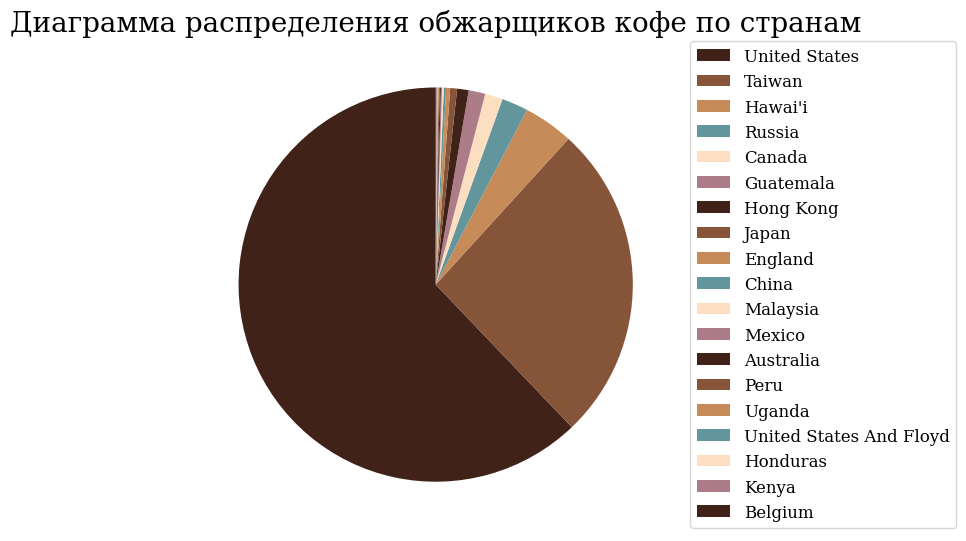

In [80]:
pie_chart(coffee_data, "loc_country", "Диаграмма распределения обжарщиков кофе по странам")

На диаграмме четко видно, что большинство обжарщиков располагаются в США и Тайване.

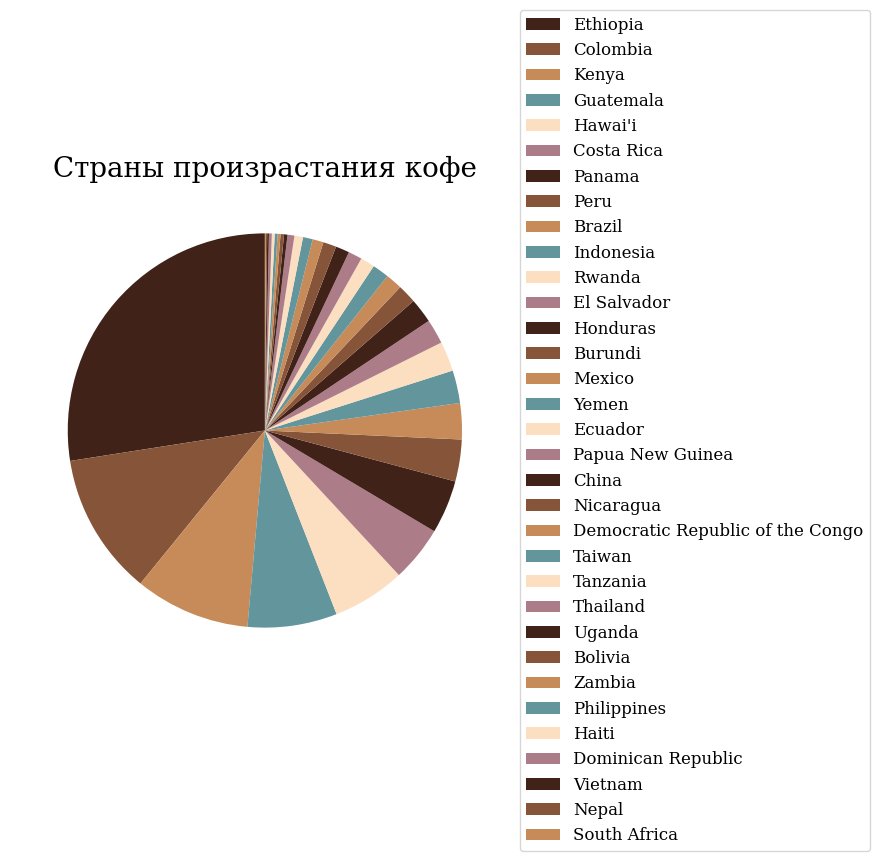

In [81]:
pie_chart(coffee_data, "origin", "Страны произрастания кофе")

На диаграмме видно, что большинство данных представлены из Эфиопии, Колумбии и Кении.

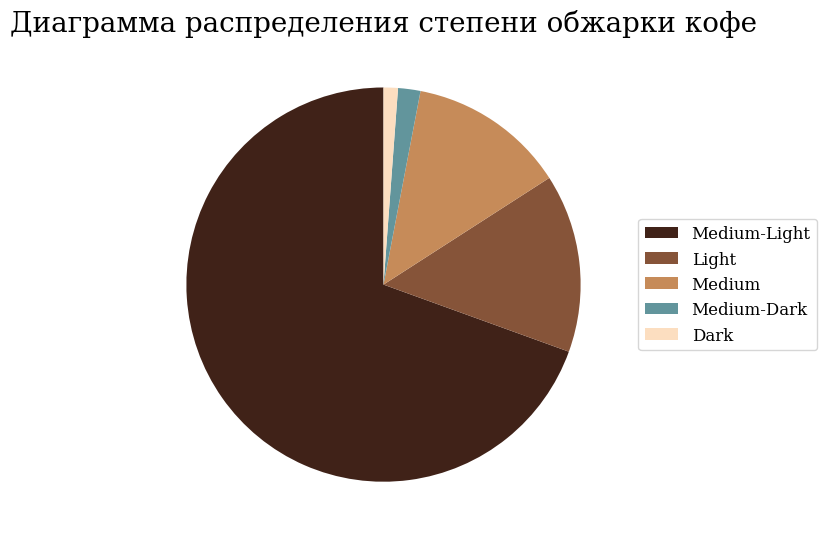

In [82]:
pie_chart(coffee_data, "roast", "Диаграмма распределения степени обжарки кофе")

Неожиданно, но самой популярной степенью обжарки является Medium-Light, из чего можно сделать вывод, что большинство обжарщиков работают в индустрии specialty coffee, основанной в основном на альтернативных методах заваривания.

Построим график зависимости цены кофе от его рейтинга.

In [83]:
fig_scatter = px.scatter(
    data_frame = coffee_data,
    x = 'rating',
    y = 'price_kg/USD',
    height=1000,
    width=2000,
    labels={'rating':'Рейтинг кофе', 'price_kg/USD':'Цена (USD/кг)'},
    title='График зависимости цены кофе от его рейтинга'
)
fig_scatter.show()

Мы видим, что кофе с рейтингом ниже 90 не превышает 100 долларов США за кг. Основная масса кофе с рейтингом выше 90 находится в пределах до 300 долларов за кг. Одна наблюдаются лоты за 600, а то и 800 долларов на кг. Посмотрим на них.

In [84]:
over_price_coffee = coffee_data[coffee_data['price_kg/USD'] > 300]
display(over_price_coffee)

,name,roaster,roast,loc_country,rating,origin,price_kg/USD,descriptors,review_month,review_year,agricultural_land (%),GDP,method,mono,roaster_rating,export_count
74,Civet Yirgacheffe Sisota,other,Medium-Light,Taiwan,93.0,Ethiopia,572.23,"[savory, chocolate, cherry, cedar, aroma, swee...",1,2018,36.3,9.610766e+10,0,yes,0.0,215340000.0
75,Civet Ethiopia Papilio Sidamo,other,Medium-Light,Taiwan,93.0,Ethiopia,572.23,"[sweet, tart, aged, cocoa, aroma, smooth, mout...",1,2018,36.3,9.610766e+10,0,yes,0.0,215340000.0
154,Lotus by Ninety Plus,Dragonfly Coffee Roasters,Medium-Light,United States,95.0,Panama,402.76,"[tart, bright, fresh, dark, chocolate, aroma, ...",4,2018,30.4,6.680080e+10,0,yes,4.6,2820000.0
235,Esmeralda Estate Panama Geisha,other,Medium,England,94.0,Panama,699.99,"[bright, lemon, tart, chocolate, aroma, mouthf...",8,2018,30.4,6.680080e+10,0,yes,0.0,2820000.0
517,Ethiopia Civet Sidama Papilio Natural,other,Medium-Light,Taiwan,93.0,Ethiopia,572.23,"[sweet, floral, syrup, dark, chocolate, aroma,...",7,2019,36.3,9.610766e+10,natural,yes,0.0,235260000.0
591,Panama Hacienda La Esmeralda Super Mario Geisha,other,Medium-Light,Australia,96.0,Panama,434.70,"[vibrant, passionfruit, dark, chocolate, jasmi...",10,2019,30.4,6.680080e+10,0,yes,0.0,3060000.0
811,Esmeralda Estate Panama Geisha,other,Medium,England,94.0,Panama,699.99,"[floral, peach, lime, cocoa, cedar, aroma, mou...",6,2020,30.4,6.680080e+10,0,yes,0.0,3300000.0
953,Panama Boquete Torre Lot #1 Geisha Honey,other,Light,Taiwan,94.0,Panama,504.00,"[floral, delicate, cocoa, honey, aroma, tart, ...",9,2020,30.4,6.680080e+10,honey,yes,0.0,3300000.0
1004,Esmeralda Estate Panama Geisha,other,Medium,England,94.0,Panama,630.00,"[aromatic, floral, balanced, orange, chocolate...",11,2020,30.4,6.680080e+10,0,yes,0.0,3300000.0
1007,Taiwan Geisha Honey,Paradise Roasters,Light,United States,94.0,Taiwan,360.86,"[honey, cocoa, cocoa, grapefruit, cashew, butt...",10,2020,21.7,1.852330e+09,honey,yes,4.7,984317.0


На первый взгляд может показаться, что такая цена за кофе - выбросы. Однако, если присмотреться, все представленные позии имеют довольно высокий рейтинг. Также этот кофе относится к редким дорогоим сортам. Например, в названии большинства позиций можно увидеть "Geisha". 

Гейша - разновидность кофейного дерева, плоды которого после обработки и обжарки обладают ярким вкусом, фруктовыми нотками, оттенками ягод, цитрусовых и меда. Такой кофе используют на профессиональных чемпионатах, поэтому цена на такой кофе может быть оправдана. 

Посмотрим, в каких регионах произрастает кофе с высоким рейтингом.

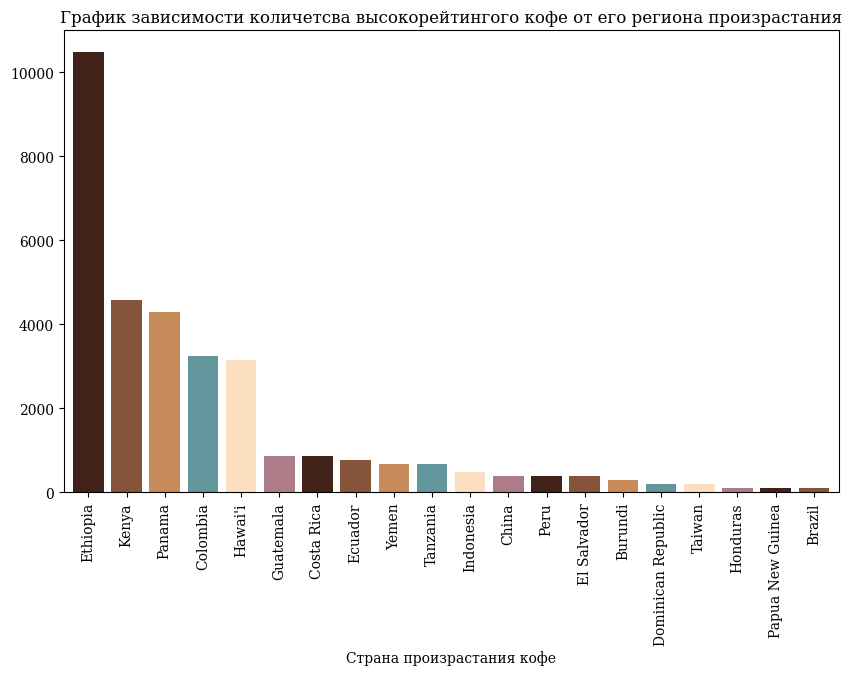

In [85]:
def ratings(df, col, rating):
    df = df.loc[df["rating"] >=rating, :]
    countries = df.groupby(col)["rating"].sum()
    
    plt.figure(figsize=(10,6))
    countries.sort_values(ascending=False).plot.bar(color=my_colors,
                                               width = 0.8)
    plt.title('График зависимости количетсва высокорейтингого кофе от его региона произрастания')
    plt.xlabel('Страна произрастания кофе') 
    plt.show();
    
highly_rated_df = coffee_data[coffee_data["rating"] >=95]
the_rest = coffee_data[coffee_data["rating"]<95]

ratings(highly_rated_df, "origin", 95)

Как мы видим, большая часть высокорейтингого кофе идет из Эфиопии, что не удивительно, ведь кофейное дерево Гейша начало свое распространение именно из этой страны.

Проверим, зависит ли цена кофе от процента земель, используемых под сельское хозяйство.

In [86]:
fig_scatter = px.scatter(
    data_frame = coffee_data,
    x = 'agricultural_land (%)',
    y = 'price_kg/USD',
    height=1000,
    width=2000,
    labels={'agricultural_land (%)':'Количество земель, используемых под сельское хозяйство (%)', 'price_kg/USD':'Цена (USD/кг)'},
    title='График зависимости цены кофе от количества земель, используемых под сельское хозяйство'
)
fig_scatter.show()

В целом можно считать, что теория подтвердилась. На графике видно, что самые дорогие лоты имеено в тех регионах, где есть ограничение по земляным ресурсам. 

Попробуем рассмотреть сезонность цены кофе.

In [87]:
# создадим временную переменную, отображающую год и месяц отзыва
coffee_data['review_date'] = coffee_data['review_year'].astype(str) + '-' + coffee_data['review_month'].astype(str)

group = coffee_data.groupby(['review_date'], as_index=False)['price_kg/USD'].mean()

fig_bar = px.bar(
    data_frame = group,
    x = 'review_date',
    y = 'price_kg/USD',
    labels={'review_date':'Время отзыва (год-месяц)', 'price_kg/USD':'Цена (USD/кг)'},
    height=1000,
    width=2000,
    title='Гистограмма зависимости цены на 1 кг кофе от времени'
)
fig_bar.show()

В диаграмме четко виднеется волнообразная зависимость, которая принимает свой максимум в осенне-зимний период, а минимум - в летний.

Это может объясняться тем, что летом люди отдают предпочтение прохладительным напиткам и возвращают кофе в свою жизнь только с приходом осенних холодов. Также подъем цен зимой может объясняться приближением рождественских и новогодних праздников.


Пики, приходящиеся на август, можно объяснить проведением междунородных соревнований по завариванию кофе (таких как World Barista Chempionship).

In [88]:
group = coffee_data.groupby(['review_date', 'origin'], as_index=False)['export_count'].sum()


fig_bar = px.bar(
    data_frame = group,
    x = 'review_date',
    y = 'export_count',
    color = 'origin',
    labels={'review_date':'Время отзыва (год-месяц)', 'export_count':'Количество экспортируемого зерна'},
    height=1000,
    width=2000,
    title='Гистограмма зависимости количества экспортируемого зерна кофе от времени'
)
fig_bar.show()

Из графика видно, что Колумбия и Эфиопия практически всегда поставляет зерно, с развитием времени виден рост экпорта. А вот такие страны, как Коста-Рика, очень нестабильны в плане количества экспорта и его частоты (есть пропуски в 3 месяца).

In [89]:
# удалим ранее созданный признак
coffee_data.drop(["review_date"], axis=1, inplace=True)

In [90]:
fig_box = px.box(
    data_frame = coffee_data,
    x = 'price_kg/USD',
    y = 'roast',
    height=1000,
    width=2000,
    labels={'price_kg/USD':'Цена (USD/кг)', 'roast':'Степень обжарки'},    
    title='Коробчатая диаграмма рраспределения опыта работы (в месяцах) соискателей'
)
fig_box.show()

Посмотрим на распределение цены для моносортов и блендов.

In [91]:
fig_box = px.box(
    data_frame = coffee_data,
    x = 'price_kg/USD',
    y = 'mono',
    height=1000,
    width=2000,
    labels={'price_kg/USD':'Цена (USD/кг)', 'mono':'Моносорт или бленд'},   
    title='Коробчатая диаграмма рраспределения цены кофе для моносортов и блендов'
)
fig_box.show()

По коробчатым диаграммам четко видно, что по всем параметра (расброс цены, средняя цена и т.д.) моносорта обходят бленды, что, в целом, логично.

Из коробчатых диаграмм видно, что наибольший разброс цен наблюдает у обжарки Medium, а самая высокая средняя цена - у обжарки Medium-Dark. Также видно, что степень обжарки Dark не пользуется популярностью, в то время как более гибкие степени (Medium-Dark, Medium и Medium-Light) имеют большую популярность и большую цену за кг зерна.

Посмотрим на распределение дескрпторов по популярности.

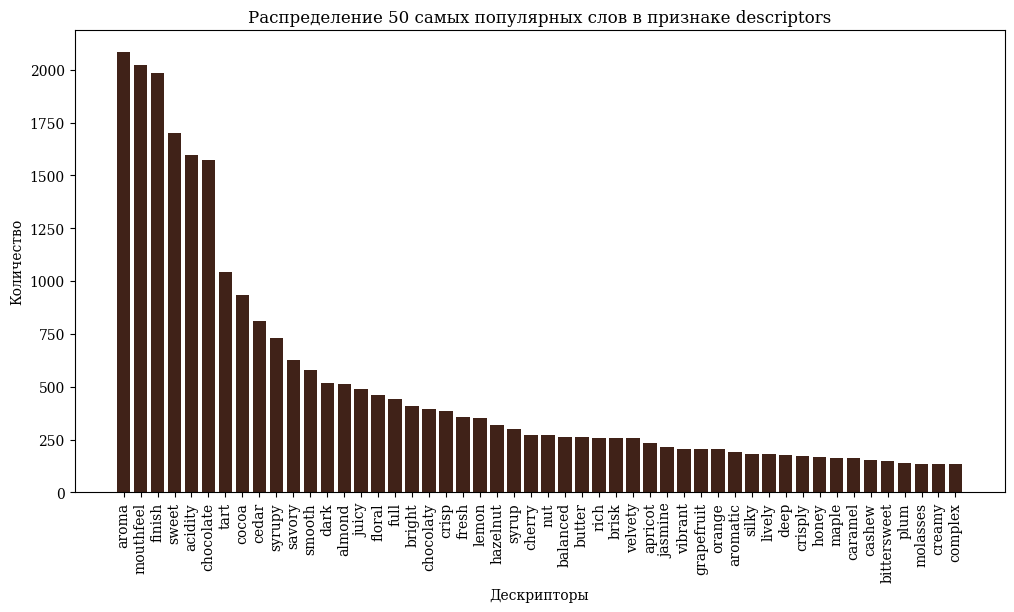

In [92]:
from collections import Counter

all_words = []
for descriptors in coffee_data['descriptors']:
    for word in descriptors:
        all_words.append(word)

word_counts = Counter(all_words)

top_50_words = word_counts.most_common(50)

x = [word[0] for word in top_50_words]
y = [word[1] for word in top_50_words]

plt.figure(figsize=(12, 6))
plt.bar(x, y)
plt.xlabel('Дескрипторы')
plt.ylabel('Количество')
plt.title('Распределение 50 самых популярных слов в признаке descriptors')
plt.xticks(rotation=90)
plt.show()

# Выводы:

1. В целом в данных не наблюдается каких-то аномалий и выбросов, но датасет требуется дополнительно преобразовать;
2. Для дорогих сортов кофе (типа Гейши), можно создлать отдельный признак, чтобы высокий прайс не казался выбросом в наших данных;
3. Выведеный список самых популярных дескрипторов будем использовать для формирования новых признаков.

## 4. Отбор и преобразование признаков

В данной части перед нами стоит несколько задач:
* добавить признаки;
* преобразовать признаки;
* удалить неинформативные признаки;
* масштабировать и трансформировать некоторые признаки.

Создадим новый признак для дорогих сортов кофе

In [93]:
coffee_data['expensive_type'] = coffee_data['price_kg/USD'].apply(lambda x: 1 if x > 300 else 0)

In [94]:
# закодируем признак mono
coffee_data['mono'] = coffee_data['mono'].apply(lambda x: 1 if x == 'yes' else 0)

In [95]:
# удаляем признаки
coffee_data.drop(["name"], axis=1, inplace=True)
coffee_data.drop(["roaster"], axis=1, inplace=True)

In [96]:
# создадим признаки по дескрипторам
for word, count in top_50_words:
    coffee_data[word] = coffee_data['descriptors'].apply(lambda x: 1 if word in x else 0)

In [97]:
# удаляем признак
coffee_data.drop(["descriptors"], axis=1, inplace=True)

In [98]:
# Закодирование признака method
encoded_method = pd.get_dummies(coffee_data['method'])

# Объединение закодированных признаков с исходным датасетом
coffee_data = pd.concat([coffee_data, encoded_method], axis=1)

In [99]:
# переименуем признак descriptors_x
coffee_data.rename(columns={0:"no_methods"}, inplace=True)

In [100]:
# удаляем признак method
coffee_data.drop(["method"], axis=1, inplace=True)

Мы закодировали методы обработки кофейных ягод, но есть нюанс: некоторые признаки у нас дублируются (wet и washed, например). Исправим это.

In [101]:
# попарно объединяем признаки 
coffee_data['combined_nat'] = np.maximum(coffee_data['natural'], coffee_data['dry'])
coffee_data['combined_wet'] = np.maximum(coffee_data['washed'], coffee_data['wet'])

# удаляем ненужные признаки
coffee_data.drop(["natural", 'dry', 'washed', 'wet'], axis=1, inplace=True)

# переименуем созданные признаки
coffee_data.rename(columns={'combined_wet':"washed"}, inplace=True)
coffee_data.rename(columns={'combined_nat':"natural"}, inplace=True)

In [102]:
# gроизводим кодирование категориальных признаков
coffee_data = pd.get_dummies(coffee_data)

<AxesSubplot: >

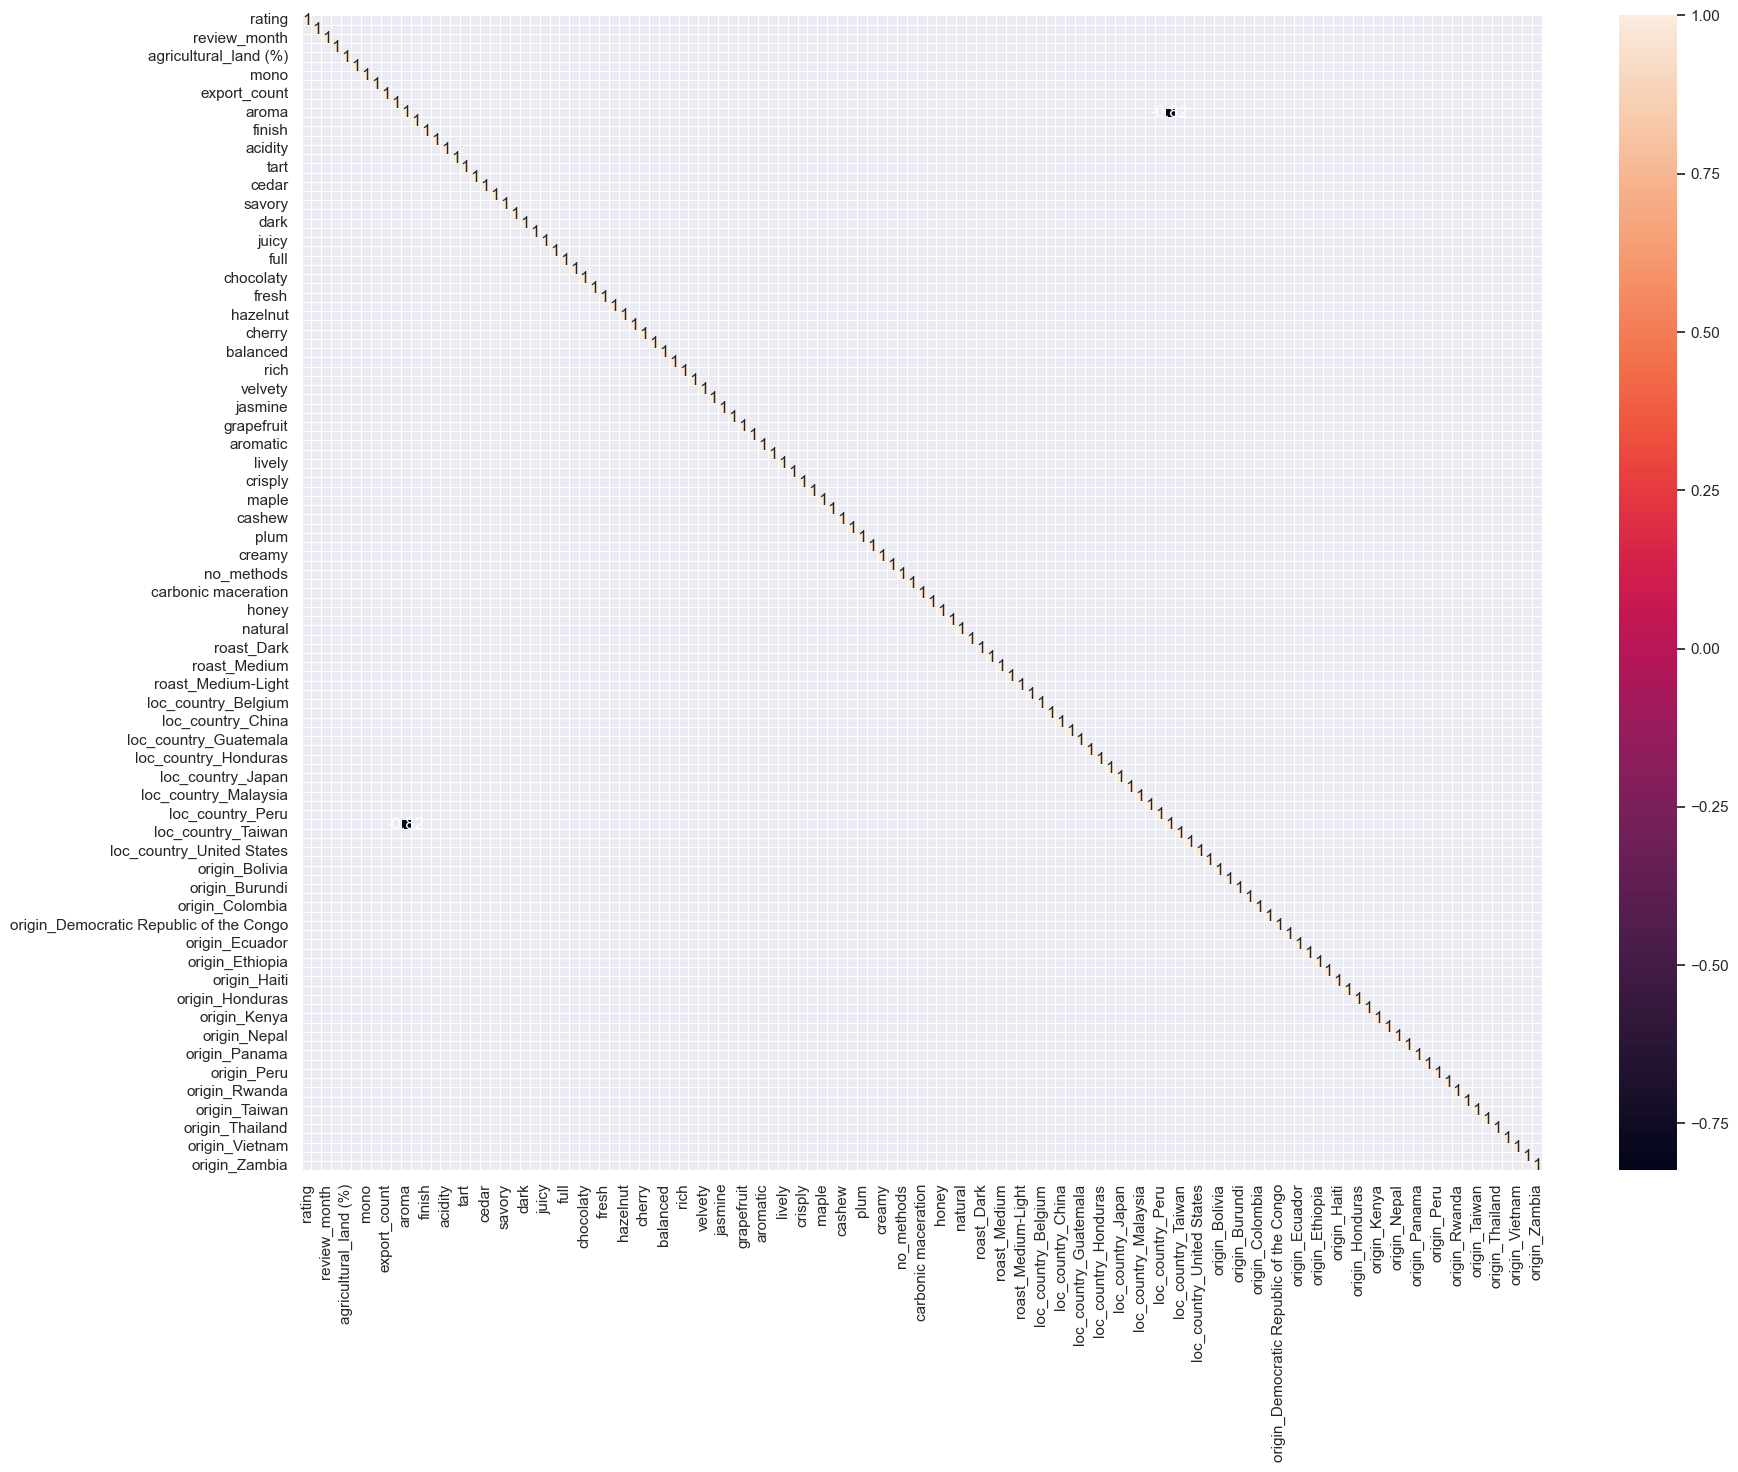

In [103]:
# строим тепловую карту корреляций
sns.set()
fig, ax = plt.subplots(figsize=(20,15))
corr_df = coffee_data.corr(method='spearman')

# отобразим корреляцию выше 80%.
sns.heatmap(corr_df[abs(corr_df) >= 0.8], annot=True, linewidths=.5, ax=ax)

По тепловой карте видно, что мультиколлинеарность наблюдается только на пересечении признака loc_country_Taiwan и aromа.

Пока не будем удалять ни один из признаков т.к. неясно, войдут ли они оба в итоговый набор данных.

In [104]:
# формировании матрицы признаков и вектор целевой переменной
X = coffee_data.drop(['price_kg/USD'], axis=1)
y = coffee_data['price_kg/USD']

In [105]:
# разделение выборки на тренировочную и валидационную 
X_train, X_valid, y_train, y_valid = model_selection.train_test_split(
    X, y, 
    test_size=0.3, 
    random_state=RANDOM_SEED
)

In [106]:
# отберем 25 признаков для предсказания целевой переменной
from sklearn.feature_selection import SelectKBest, f_regression

selector = SelectKBest(f_regression, k=25)
selector.fit(X_train, y_train)
selector.get_feature_names_out()

array(['rating', 'agricultural_land (%)', 'mono', 'export_count',
       'expensive_type', 'aroma', 'finish', 'chocolate', 'cocoa', 'cedar',
       'bright', 'jasmine', 'silky', 'honey', 'complex', 'roast_Light',
       'loc_country_China', 'loc_country_England', "loc_country_Hawai'i",
       'loc_country_Russia', 'origin_Ethiopia', "origin_Hawai'i",
       'origin_Panama', 'origin_Taiwan', 'origin_Yemen'], dtype=object)

In [107]:
# разделение выборки на тренировочную и валидационную с учетом выбранных признаков
X = X[['rating', 'agricultural_land (%)', 'mono', 'export_count',
       'expensive_type', 'aroma', 'finish', 'cocoa', 'cedar', 'bright',
        'jasmine', 'silky', 'complex', 'no_methods', 'natural',
        'loc_country_England', "loc_country_Hawai'i", 'loc_country_Russia',
        'origin_Ecuador', 'origin_Ethiopia', "origin_Hawai'i",
        'origin_Kenya', 'origin_Panama', 'origin_Taiwan', 'origin_Yemen']]

X_train, X_valid, y_train, y_valid = model_selection.train_test_split(
    X, y, 
    test_size=0.3, 
    random_state=RANDOM_SEED
)

In [108]:
# нормализуем данные с помощью minmaxsxaler
scaler = preprocessing.MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_valid)

Мы подготовили все к последнему этапу - машинному обучению.

## 5. Решение задачи регрессии

На данном этапе предстоит обучить несколько моделей линейной регрессии - от базовых до ансамблиевых с подбором автоматическим подбором гиперпараметров - оценить качество построенных моделей и сделать выводы.  

In [109]:
# создадим функцию, которая будет выводить метрики для тренировочной и тестовой выборок
def print_metrics(y_train, y_train_predict, y_test, y_test_predict):
    print('Train R^2: {:.3f}'.format(metrics.r2_score(y_train, y_train_predict)))
    print('Train MAE: {:.3f}'.format(metrics.mean_absolute_error(y_train, y_train_predict)))
    print('Train MAPE: {:.3f}'.format(metrics.mean_absolute_percentage_error(y_train, y_train_predict)*100))
    print('\n')
    print('Test R^2: {:.3f}'.format(metrics.r2_score(y_test, y_test_predict)))
    print('Test MAE: {:.3f}'.format(metrics.mean_absolute_error(y_test, y_test_predict)))
    print('Train MAPE: {:.3f}'.format(metrics.mean_absolute_percentage_error(y_test, y_test_predict)*100))

# Линейная регрессия

In [110]:
# построим модель линейной регрессии с параметрами по умолчанию
lr_model = linear_model.LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_predicted_train = lr_model.predict(X_train_scaled)
y_predicted_test = lr_model.predict(X_test_scaled)
print_metrics(y_train, y_predicted_train, y_valid, y_predicted_test)

Train R^2: 0.734
Train MAE: 20.464
Train MAPE: 49.307


Test R^2: 0.777
Test MAE: 21.146
Train MAPE: 41.093


Модель линейной регрессии с параметрами по умолчанию показывает не плохие результаты: метрики для тренировочной и тестовой выборках близки друг к другу, что хорошо.

# Дерево решений

In [111]:
# создадим модель дерева решений с параметрами по умолчанию
dt_model = tree.DecisionTreeRegressor(
    random_state=RANDOM_SEED 
)
dt_model.fit(X_train_scaled, y_train)
y_predicted_train = dt_model.predict(X_train_scaled)
y_predicted_test = dt_model.predict(X_test_scaled)
print_metrics(y_train, y_predicted_train, y_valid, y_predicted_test)


Train R^2: 0.981
Train MAE: 2.852
Train MAPE: 6.283


Test R^2: 0.605
Test MAE: 26.534
Train MAPE: 50.541


Дерево решений с параметрами по умолчанию показывает результат хуже, чем линейная регрессия. Да, метрики на тренировочных данных подросли, однако разрыв между метриками тренировочной и тестовой выборках слишком большой, метрика тестовой выборки показывает явное недообучение модели машинного обучения.

# Случайный лес

In [115]:
# создаем объект класса случайный лес с параметрами по умолчанию. 
rf_model = ensemble.RandomForestRegressor(
    random_state=RANDOM_SEED)

rf_model.fit(X_train_scaled, y_train)
y_predicted_train = rf_model.predict(X_train_scaled)
y_predicted_test = rf_model.predict(X_test_scaled)
print_metrics(y_train, y_predicted_train, y_valid, y_predicted_test)

Train R^2: 0.945
Train MAE: 8.957
Train MAPE: 21.705


Test R^2: 0.770
Test MAE: 21.489
Train MAPE: 42.405


В отличии от решающего дерева, случайных лес показывает лучшее качество метрик для тестовой выборки, однако разрыв между метриками все еще велик. Попробуем другой подход.

# Градиентный бустинг

In [116]:
from sklearn.ensemble import GradientBoostingRegressor

# создаем объект класса градиентный бустинг с параметрами по умолчанию.
gb = GradientBoostingRegressor(
    random_state=RANDOM_SEED 
)

gb.fit(X_train_scaled, y_train)
y_predicted_train = gb.predict(X_train_scaled)
y_predicted_test = gb.predict(X_test_scaled)
print_metrics(y_train, y_predicted_train, y_valid, y_predicted_test)

Train R^2: 0.837
Train MAE: 16.137
Train MAPE: 44.894


Test R^2: 0.761
Test MAE: 20.188
Train MAPE: 39.095


В отличии от прошлого метода метрики тренировочной и тестовой выборке снизилась, при это разрыв между ними снизился значительно, а переобучения или недообучения не наблюдается. 

Вывод: из всех моделей именно градиентный бустинг показывает наилучшие метрики на тестовых и тренировочных данных. Для этой модели будем подбирать гиперпараметры для улучшения показателей метрик. 

In [114]:
import optuna
from sklearn.metrics import mean_squared_error

def objective(trial):
    # задаем пространства поиска гиперпараметров
    learning_rate = trial.suggest_categorical('learning_rate', [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
    n_estimators = trial.suggest_int('n_estimators', 100, 500, 100)
    max_depth = trial.suggest_int('max_depth', 7, 20)
    min_samples_split = trial.suggest_int('min_samples_split', 10, 100, 10)

    # создаем модель
    model = ensemble.GradientBoostingRegressor(
        learning_rate=learning_rate,
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        random_state=RANDOM_SEED
    )
    # обучаем модель
    model.fit(X_train_scaled, y_train)
    y_predicted_train = model.predict(X_train_scaled)
    y_predicted_test = model.predict(X_test_scaled)

    # возвращаем значение метрики для оптимизации
    return mean_squared_error(y_valid, y_predicted_test)

# создаем объект исследования
study = optuna.create_study(direction="minimize")
# ищем лучшую комбинацию гиперпараметров n_trials раз
study.optimize(objective, n_trials=100)

# получаем лучшие значения гиперпараметров
best_params = study.best_params
print("Наилучшие значения гиперпараметров: {}".format(best_params))

# создаем модель с лучшими значениями гиперпараметров
best_model = ensemble.GradientBoostingRegressor(
    learning_rate=best_params['learning_rate'],
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    random_state=RANDOM_SEED
)
# обучаем модель на всем обучающем наборе данных
best_model.fit(X_train_scaled, y_train)
y_predicted_train = best_model.predict(X_train_scaled)
y_predicted_test = best_model.predict(X_test_scaled)

print_metrics(y_train, y_predicted_train, y_valid, y_predicted_test)

[I 2023-08-29 13:19:35,260] A new study created in memory with name: no-name-3d2cbbe3-904f-4eb8-b5f7-f943a44b6570
[I 2023-08-29 13:19:37,195] Trial 0 finished with value: 1939.68928562109 and parameters: {'learning_rate': 0.4, 'n_estimators': 400, 'max_depth': 19, 'min_samples_split': 50}. Best is trial 0 with value: 1939.68928562109.
[I 2023-08-29 13:19:38,079] Trial 1 finished with value: 2199.4517913902323 and parameters: {'learning_rate': 0.7, 'n_estimators': 200, 'max_depth': 19, 'min_samples_split': 40}. Best is trial 0 with value: 1939.68928562109.
[I 2023-08-29 13:19:39,352] Trial 2 finished with value: 1652.4460291928222 and parameters: {'learning_rate': 0.1, 'n_estimators': 300, 'max_depth': 11, 'min_samples_split': 40}. Best is trial 2 with value: 1652.4460291928222.
[I 2023-08-29 13:19:40,631] Trial 3 finished with value: 2493.7773199993444 and parameters: {'learning_rate': 1.0, 'n_estimators': 300, 'max_depth': 14, 'min_samples_split': 30}. Best is trial 2 with value: 1652

Наилучшие значения гиперпараметров: {'learning_rate': 0.1, 'n_estimators': 100, 'max_depth': 7, 'min_samples_split': 60}
Train R^2: 0.842
Train MAE: 15.538
Train MAPE: 40.961


Test R^2: 0.794
Test MAE: 19.807
Train MAPE: 38.014


Видимо, что с помощью optuna мы подобрали наилучие параметры для модели градиентного бустинга. Все метрики подросли, разрыв между тренировочными и тестовыми данными небольшой. 

# Выводы по итоговому проекту:

1. Познакомились с исходным датасетом, преобразовали его, дополнили данными из других датасетов, создали новые признаки;
2. С помощью инструментов визуализации выявили закономерности между признаками, определили важность некоторых признаков, определили, как можно улучшить имеющиеся данные;
3. На этапе преобразования создали новые признаки подготовленного датасета, удалили неинформативные, произвели кодирование категоральных признаков, проверили данные на мультиколлиниарность, отобрали 25 самых важных признаков;
4. На этапе машинного обучения рассмотрели основные модели регресии, оценили метрики каждой модели, по ним выбрали наилучшую и к ней применили метод подбора гиперпараметров для улучшения метрик итоговой модели.